<h2>ALY6015_SpringA2020_Group_Assignment_Team#1</h2>
<p> <b>Week: </b>6</p>
<p> <b>Tittle:</b> Group Assignment</p>
<p><b>Course:</b> ALY6015 Intermediate Analytics</p>
<p><b>Instructor:</b>Fidel Rodriguez</p>
<p> <b>Team:</b> 1</p>
<p><b>Team Members:</b></p>
<ul>
        <li>Pragati Koladiya, </li>
        <li>Tanvi Bhagat,</li>
        <li>Munitha Priyanka Kanukollu </li>
</ul>


<h3>AIM:</h3> 
<p>- Figure out the standard patterns of booking a hotel room.</p>
<p>- Show some booking information details with Exploratory Data Analysis(EDA)</p>
<p>- Find best model to predict hotel booking cancellations</p>
<p>- The goal of predictive analysis is to avoid overfitting and find the model that gives the highest accuracy</p>

<h2>Dataset Information:</h2>
<p>- Data which compares various booking information between two hotels: a city hotel and a resort hotel.</p>
<p>- Includes 31 features such as when the booking was made, length of stay, average daily rate, room type and the booking cancellations, among other things.</p>
<p>- The data contains "bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017".</p>

<h2>Exploratory Data Analysis (EDA)</h2>

<ul>
    <li>Booking data by country of origin</li>
    <li>Confirmation vs Cancellations?</li>
    <li>Which year had most canceled bookings?</li>
    <li>Which month had the most bookings?</li>
    <li>Per month arrivals?</li>
    <li>Per day arrivals?</li>
    <li>How many number of stays on weekend and weeknights?</li>
    <li>Price: Resort vs City?</li>
    <li>How much do guests pay for a room per night?</li>
    <li>How long do people stay at the hotels?</li>
</ul>

<h2>Preprocessing</h2>
<ul>
    <li>Checking missing values</li>
    <li>Dropping columns</li>
    <li>Label Encoder</li>
    <li>Feature Selection</li>
    <li>Final arrangements before model comparison</li>
</ul>

<h2>Models Implemented</h2>
<ul>
    <li><b>Decision Tree</b></li>
    <ul>Used to solve regression and classification problems and can handle colinearity better than logisyic regression
    </ul>
    <li><b>Logistic Regression</b></li>
    <ul>
        <li>Liblinear: Scikit solver functions for multi class logistic regression with one vs rest.</li>
        <li>Lbfgs: Overcome the drawbacks of liblinear and performs fast by saving memory.</li>
    </ul>
    <li><b>KNN Classifier</b></li>
    <ul>
        <li>Faster compared to other classification models.</li>
        <li>KNN with optimum k value: To check how accurately the classifier or model can predict.</li>
    </ul>
    <li><b>Random Forest Classifier</b></li>
    <ul>
        <li>To cancel the biases, for robust method and accuracy.</li>
        <li><b>Grid search:</b> Tuning the model by using few parameters.</li>
    </ul>
    <li><b>Lasso Regularization model</b></li>
    <ul>
        <li>For best feature selection</li>
    </ul>
</ul>

<h3>Import packages</h3>

In [1]:
#!pip install folium
#!pip install geopandas
#!pip install descartes

In [2]:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import os
import pandas as pd
from pandas import pivot_table
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from pylab import rcParams

import random

import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model, decomposition, datasets
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,make_scorer,classification_report,roc_curve,auc,accuracy_score

import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = (23, 8)
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

<h3>Acquire and load the data</h3>

In [3]:
data_path="https://docs.google.com/spreadsheets/d/e/2PACX-1vRJre7roYxKxKnTTyz7rvF25ALuK01PuGaF8Rq_Q5hCpsgzwmyg7Brz55suXtEu17vLtmyyuRLBVZlU/pub?gid=1756039824&single=true&output=csv"
original_dataset= pd.read_csv(data_path)

In [4]:
original_dataset.shape

(119390, 32)

In [5]:
original_dataset.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
original_dataset.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
original_dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

<h3>
  <b> Dataset Information: </b> 
</h3>
<p> 
    <i><b>Hotel Bookings</b></i>
</p>
<ol style="list-style-type:squre;">
     <li><b>hotel</b> - Hotel (Resort Hotel or City Hotel)</li>
     <li><b>is_canceled</b> - Value indicating if the booking was canceled (1) or not (0)</li>
     <li><b>lead_time</b> - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date</li>
     <li><b>arrival_date_year</b> - Year of arrival date</li>
     <li><b>arrival_date_month</b> - Month of arrival date</li>
     <li><b>arrival_date_week_number</b> - Week number of year for arrival date</li>
     <li><b>arrival_date_day_of_month</b> - Day of arrival date</li>
     <li><b>stays_in_weekend_nights</b> - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel</li> 
     <li><b>stays_in_week_nights</b> - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
</li>
    <li><b>adults</b>- Number of adults</li>
     <li><b>children</b> - Number of children</li>
     <li><b>babies</b> - Number of babies</li>
     <li><b>meal</b> - Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)</li>
     <li><b>country</b> - Country of origin. Categories are represented in the ISO 3155–3:2013 format
</li>
     <li><b>market_segment</b> - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”</li>
     <li><b>distribution_channel</b> - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”</li>
     <li><b>is_repeated_guest</b> - Value indicating if the booking name was from a repeated guest (1) or not (0)</li>
     <li><b>previous_cancellations</b> - Number of previous bookings that were cancelled by the customer prior to the current booking</li>
     <li><b>previous_bookings_not_canceled</b> - Number of previous bookings not cancelled by the customer prior to the current booking
</li>
     <li><b>reserved_room_type</b>Code of room type reserved. Code is presented instead of designation for anonymity reasons.</li>
     <li><b>assigned_room_type</b> - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.</li>
     <li><b>booking_changes</b> - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation</li>
     <li><b>deposit_type</b> - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.</li>
    <li><b>agent</b> - ID of the travel agency that made the booking</li>
     <li><b>company</b> - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
</li>
     <li><b>days_in_waiting_list</b> - Number of days the booking was in the waiting list before it was confirmed to the customer</li>
    <li><b>customer_type</b> - <i>Type of booking, assuming one of four categories:</i>
Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking</li>
     <li><b>adr</b> - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights</li>
     <li><b>required_car_parking_spaces</b> - Number of car parking spaces required by the customer</li>
    <li><b>total_of_special_requests</b> - Number of special requests made by the customer (e.g. twin bed or high floor)</li>
     <li><b>reservation_status</b> - <i>Reservation last status, assuming one of three categories: </i> Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why</li>
     <li><b>reservation_status_date</b> - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel</li>
        
</ol>  

In [8]:
df_hotel = original_dataset.copy()

<h2>Confirmation vs Cancellations</h2>

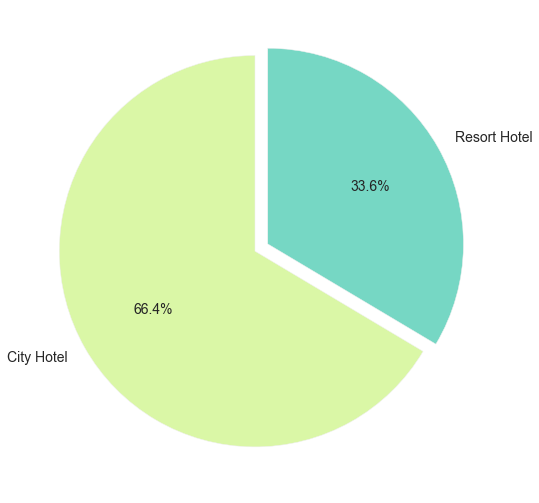

In [9]:
#Overview of type of hotel

#Enlarging pie chart
plt.rcParams['figure.figsize'] = 9,9

#Indexing labels
labels = df_hotel['hotel'].value_counts().index.tolist()

#Convert value counts to list
sizes = df_hotel['hotel'].value_counts().tolist()

#Explode to determine how much each section is separated from each other
explode = (0,0.075)

#Coloring pie chart
colors = ['#DAF7A6', '#76D7C4']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14} )

plt.show()

=> From the pie chart above we can see that two third of people chose the city hotel option.

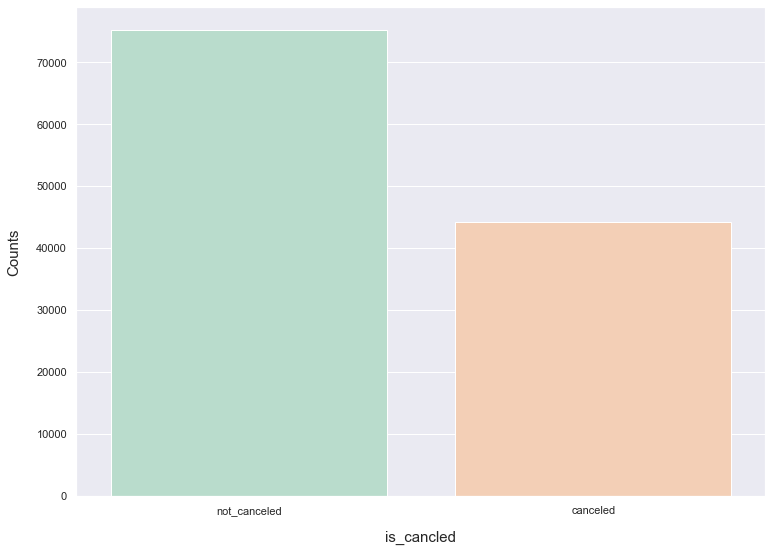

In [10]:
#analyzing canceled bookings data

sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')
sns.set(palette='Pastel2')

df_hotel['is_canceled'] = df_hotel.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = df_hotel['is_canceled']
sns.countplot(canceled_data)

plt.xlabel("is_cancled", labelpad = 15, fontsize=15)
plt.ylabel("Counts", labelpad = 15, fontsize=15);

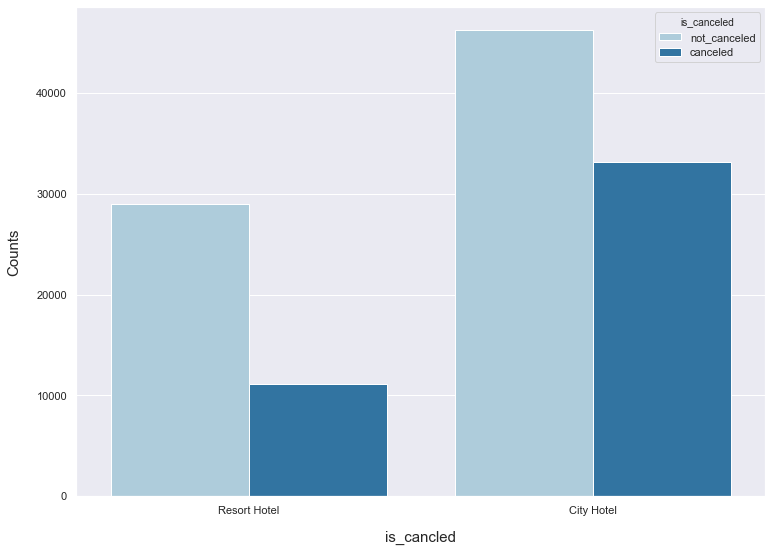

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')
sns.set(palette='Paired')


sns.countplot(x='hotel',data=df_hotel, hue='is_canceled')
plt.xlabel("is_cancled", labelpad = 15, fontsize=15)
plt.ylabel("Counts", labelpad = 15, fontsize=15);

plt.show()

=> As a greater number of people prefer the City Hotel, it has the largest number of canceled and confirmed bookings.

<h2>Which year had the most bookings?</h2>

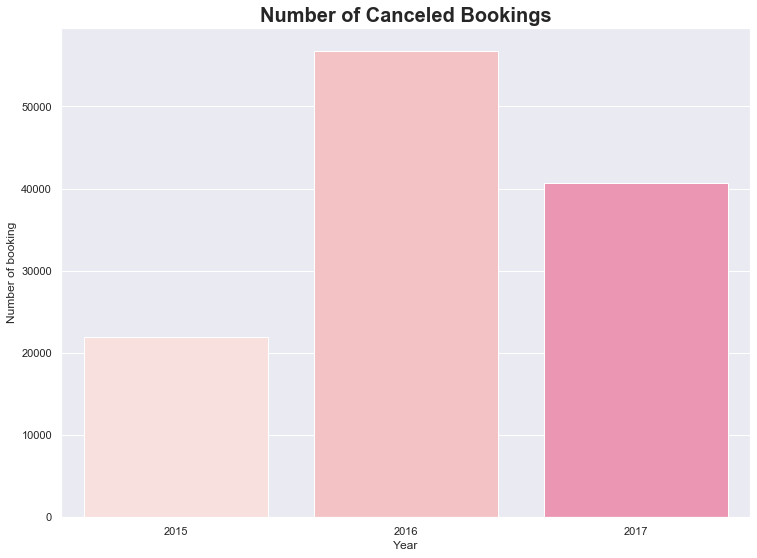

In [12]:
#bookings_by_year_canceled = df[df.is_canceled == 1].groupby('arrival_date_year').arrival_date_year.count()
#ax = sns.barplot(bookings_by_year_canceled.index,bookings_by_year_canceled.values)
#plt.title('Number of Canceled Bookings')
#for p in ax.patches:
#    ax.text(p.get_x()+p.get_width()/4,p.get_height(),f"{int(p.get_height())}",fontsize=16)

sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')

sns.set(palette='RdPu')

ax = sns.countplot(x="arrival_date_year", data=df_hotel)
ax.set(xlabel='Year', ylabel='Number of booking')
plt.title('Number of Canceled Bookings', fontsize=20, weight='bold')
plt.show()

<p>=> 2016 is the year that had the greatest number of canceled bookings as well as confirmed bookings.</p>
<p>=> Overall, 37% of the total bookings for both the hotels were canceled.</p>

<h2> Which month had the most bookings?</h2>

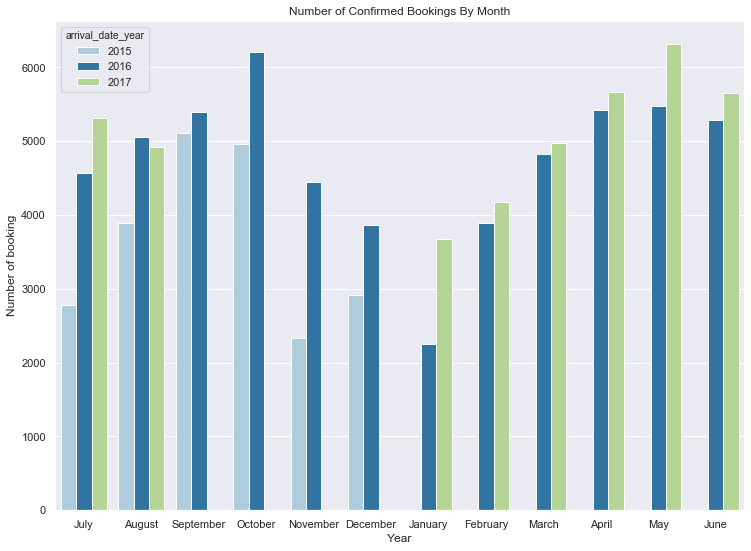

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')

sns.set(palette='Paired')

ax = sns.countplot(x="arrival_date_month", data=df_hotel, hue="arrival_date_year")
ax.set(xlabel='Year', ylabel='Number of booking')
plt.title('Number of Confirmed Bookings By Month')
plt.show()   


<p>=> May 2017 had the greatest number of bookings followed by October,2016.</p>
<p>=> No Bookings from September to December for the year 2017.</p>

<h2> Which year had most cancelled bookings?</h2>

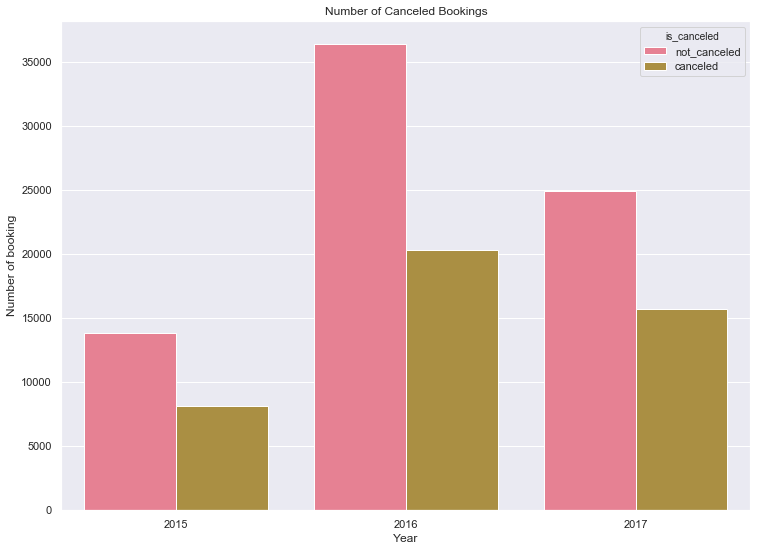

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')

sns.set(palette='husl')

ax = sns.countplot(x="arrival_date_year", data=df_hotel, hue="is_canceled")
ax.set(xlabel='Year', ylabel='Number of booking')
plt.title('Number of Canceled Bookings')
plt.show()  

<p>=> 2016 is the year that had the most number of canceled bookings as well as confirmed bookings.</p>
<p>=> Overall, 37% of the total bookings for both the hotels were canceled.</p>

<h2> How many days ahead people usually book?</h2>

In [15]:
df_hotel.lead_time.agg(['min','mean','max'])

min       0.000000
mean    104.011416
max     737.000000
Name: lead_time, dtype: float64

<p>=> People usually made a booking 3 months ahead</p>
<p>=> Extreme cases appeared to be someone booked on the same day they checked in or someone made a booking 2 years ahead.</p>

Text(0.5, 1.0, 'Graph showing number of arrivals per year')

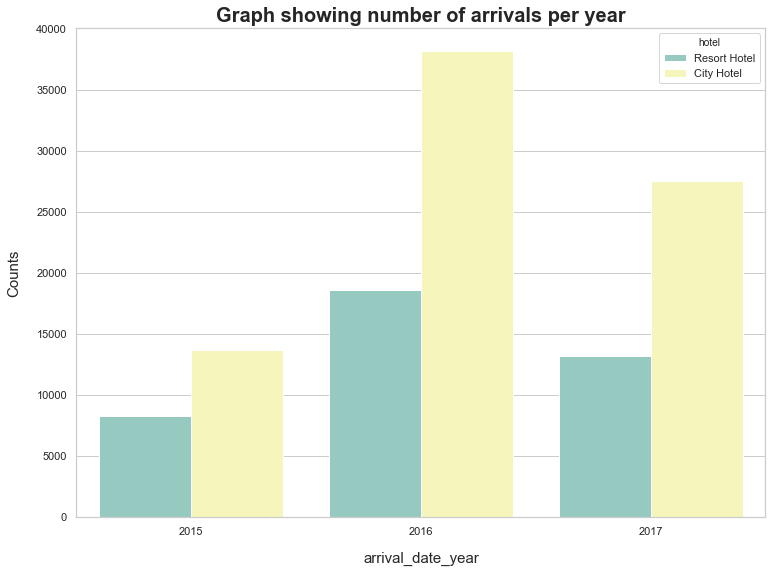

In [16]:
#Graph arrival year
sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')

current_palette_4 = sns.color_palette("Set3", 4)
sns.set_palette(current_palette_4)

lst3 = ['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
period_arrival = df_hotel[lst3]

sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel')

plt.xlabel("arrival_date_year", labelpad = 15, fontsize=15)
plt.ylabel("Counts", labelpad = 15, fontsize=15);
plt.title("Graph showing number of arrivals per year", fontsize=20, weight='bold')


=> In the plot above we se that city hotels had the most bookings consistently each year with the largest amount of bookings in 2016.

<h2>Per month arrivals?</h2>

Text(0.5, 1.0, 'Graph showing number of arrivals per month')

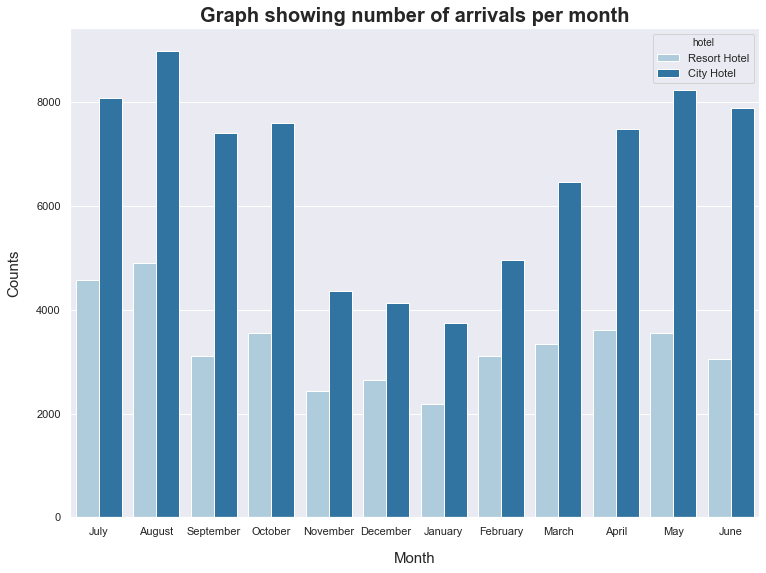

In [17]:
#Graph arrival month
sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')
sns.set(palette='Paired')

plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = df_hotel)

plt.xlabel('Month') # Creating label for xaxis
plt.ylabel('Count') # Creating label for yaxis

plt.xlabel("Month", labelpad = 15, fontsize=15)
plt.ylabel("Counts", labelpad = 15, fontsize=15);
plt.title("Graph showing number of arrivals per month", fontsize=20,weight='bold')


<p>=> The trend shows that bookings occur at the highest rate around the middle of year, with August being the highest. </p>

<p>=> City hotels have more customers in all months. Considering proportionally, resort hotels seem to be a little closer to city hotels in summer.</p>

<p>=> Fewer customers come in the winter months, so when we look at the cancellation rates, it is quite normal that it appears less in the winter months.</p>


<h2>Per day arrivals?</h2>

Text(0.5, 1.0, 'Graph showing number of arrivals per day')

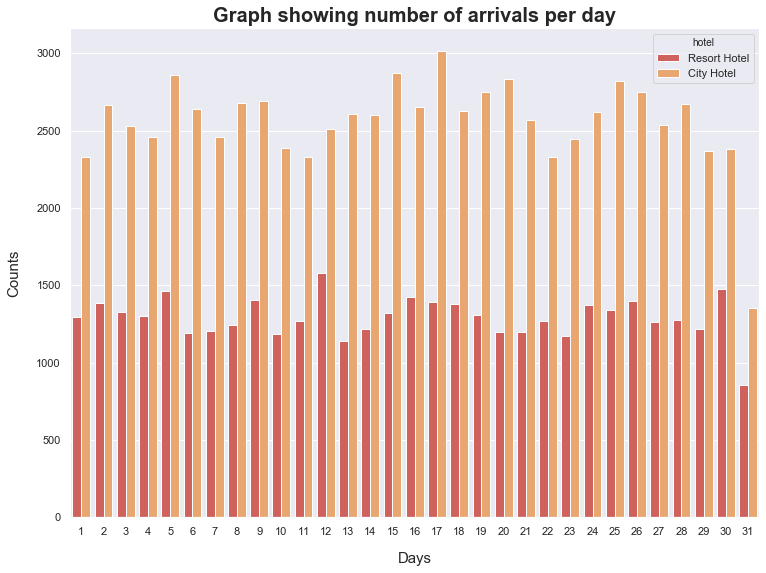

In [18]:
#Graph arrival dates
sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')
sns.set(palette='Spectral')

sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', hue = 'hotel')

plt.xlabel("Days", labelpad = 15, fontsize=15)
plt.ylabel("Counts", labelpad = 15, fontsize=15);
plt.title("Graph showing number of arrivals per day", fontsize=20, weight='bold')


<p>=> Booking rates were highest during the year of 2016. </p>
<p>=> Additionally, the trend shows that bookings occurs at the highest rate around the middle of year, with August being the highest. Data shows that summer is a peak season for hotel booking. </p>
<p>=> There is a wave like structure to arrivals by day. My speculation is that these peaks depict hotel bookings on the weekends at a higher rate.</p>

<h2>How many number of stays on weekend and weeknights?</h2>

Text(0.5, 1.0, 'Number of stays on weekend nights')

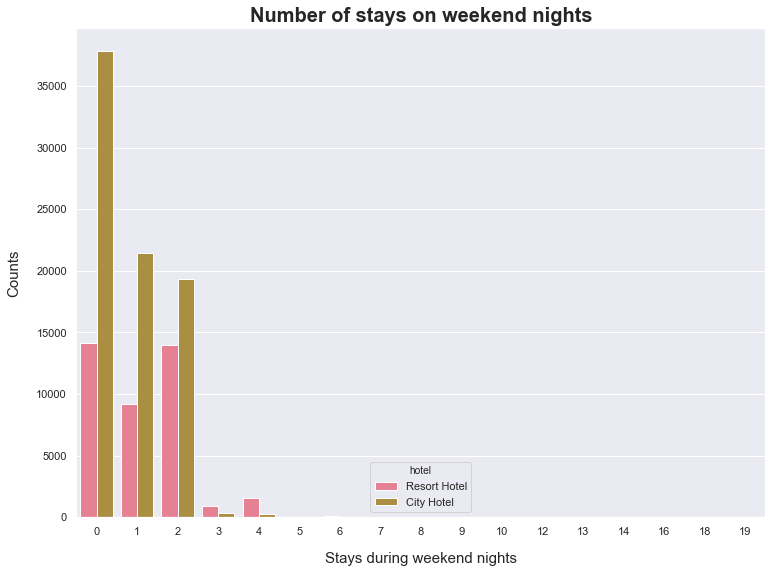

In [19]:
#Graphing weekend vs. weekday data
sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')
sns.set(palette='husl')

sns.countplot(data = df_hotel, x = 'stays_in_weekend_nights',hue = 'hotel')

plt.xlabel("Stays during weekend nights", labelpad = 15, fontsize=15)
plt.ylabel("Counts", labelpad = 15, fontsize=15);
plt.title("Number of stays on weekend nights", fontsize=20, weight='bold')



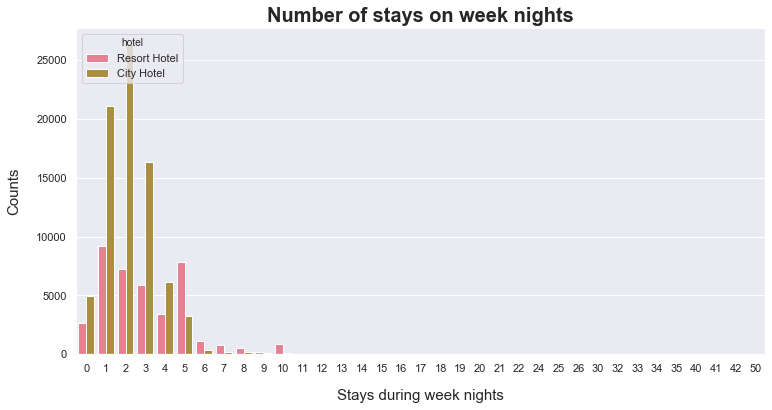

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,6))
sns.set(style='whitegrid')
sns.set(palette='husl')

sns.countplot(data = df_hotel, x = 'stays_in_week_nights', hue='hotel' )

plt.xlabel("Stays during week nights", labelpad = 15, fontsize=15)
plt.ylabel("Counts", labelpad = 15, fontsize=15);
plt.title("Number of stays on week nights", fontsize=20,weight='bold')

plt.show()

=> Our hypothesis was proven false as the majority of stays were on weekday nights.

<h2>Booking data by country of origin</h2>

In [21]:
#Graphing booking data by country of origin
country_visitors = df_hotel[df_hotel['is_canceled'] == 'not_canceled'].groupby(['country']).size().reset_index(name = 'count')

# We will be using Plotly.express to plot a choropleth map. Big fan of Plotly here!


px.choropleth(country_visitors,
                    locations = "country",
                    color= "count", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Home country of visitors")

<p>=> People from all over the world are staying in these two hotels. </p>
<p>=> Most guests are from Portugal and other countries in Europe.</p>


<h2>Count of top 10 countries visitors:</h2>

In [22]:
#top 10 contry
df_hotel["country"].value_counts().head(10)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

- Portugal(PRT) -  48590
- United Kingdom(GBR) - 12129
- France(FRA) - 10415
- Spain(ESP) - 8568
- Germany(DEU) - 7287
- Italy(ITA) - 3766
- Ireland(IRL) - 3375
- Belgium(BEL) - 2342
- Brazil(BRA) - 2224
- Netherlands(NLD) - 2014

<h2>Deposit types</h2>

Text(0.5, 1.0, 'Graph showing types of deposits')

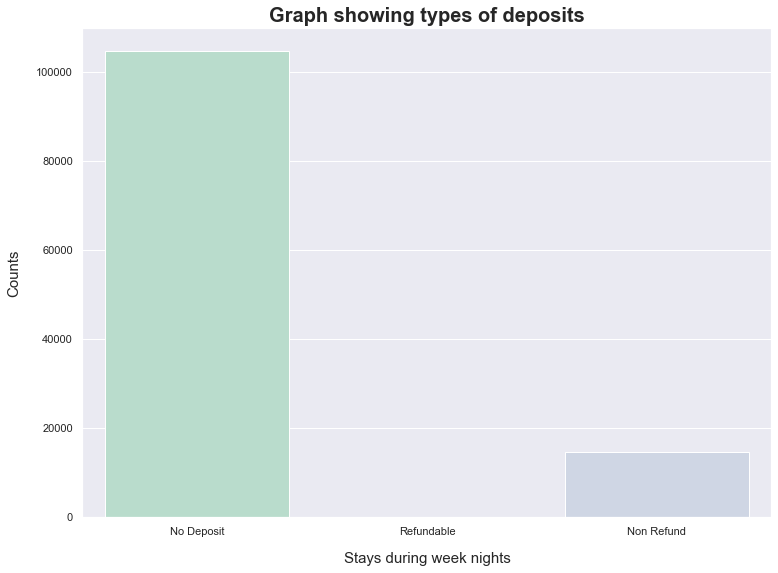

In [23]:
#graphing deposit types
sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')
sns.set(palette='Pastel2')

sns.countplot(data = df_hotel, x = 'deposit_type')

plt.xlabel("Stays during week nights", labelpad = 15, fontsize=15)
plt.ylabel("Counts", labelpad = 15, fontsize=15);
plt.title("Graph showing types of deposits", fontsize=20, weight='bold')

<p>=> Few bookings were non-refundable.</p>
<p>=> Majority of bookings did not require a deposit, this could explain the high cancelation rate.</p>

<h2>Repeated Guests?</h2>

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

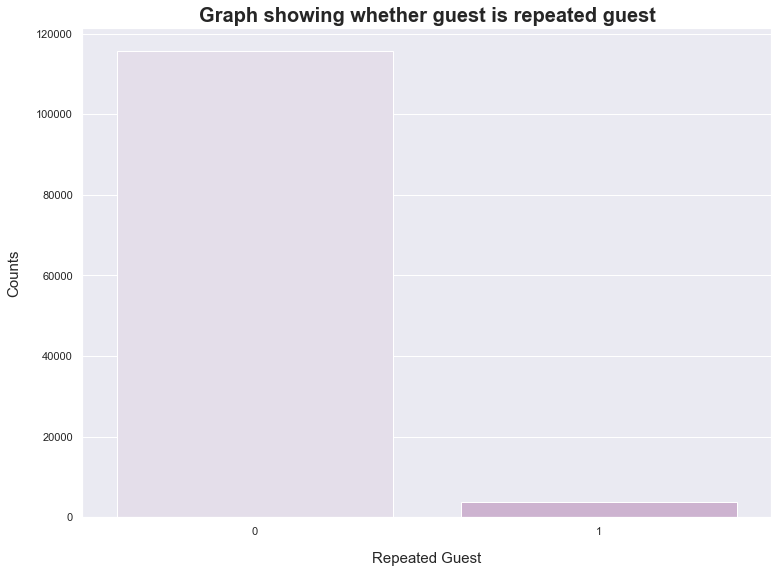

In [24]:
#graph repeated guests
sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')
sns.set(palette='PuRd')

sns.countplot(data = df_hotel, x = 'is_repeated_guest').set_title('', fontsize = 20)


plt.xlabel("Repeated Guest", labelpad = 15, fontsize=15)
plt.ylabel("Counts", labelpad = 15, fontsize=15);
plt.title("Graph showing whether guest is repeated guest", fontsize=20,weight='bold')


=> Data shows a low number of repeated guests. In business, it is far more expensive to gain a new customer than to retain an exisiting one. Further business or marketing efforts could be drafted to improve rate of return.

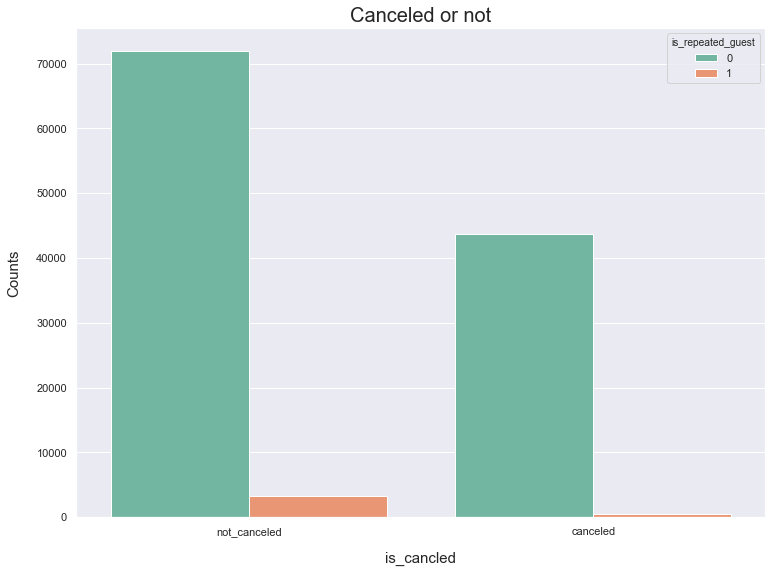

In [25]:
sns.set(palette='Set2')
plt.figure(figsize=(11,9))
plt.title("Canceled or not", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = df_hotel)
plt.xlabel("is_cancled", labelpad = 15, fontsize=15)
plt.ylabel("Counts", labelpad = 15, fontsize=15);

<p>=> There is no surprise that repeated guests do not cancel their reservations. </p>
<p>=> Of course there are some exceptions. Also most of the customers are not repeated guests.</p>

Text(0.5, 1.0, 'Graph showing type of guest')

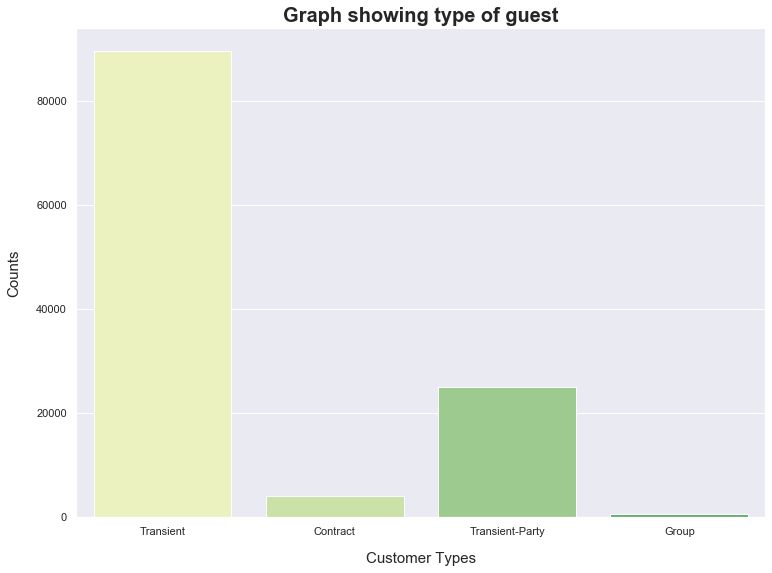

In [26]:
#graph types of guests
sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')
sns.set(palette='YlGn')


sns.countplot(data = df_hotel, x = 'customer_type')

plt.xlabel("Customer Types", labelpad = 15, fontsize=15)
plt.ylabel("Counts", labelpad = 15, fontsize=15);
plt.title("Graph showing type of guest", fontsize=20, weight='bold')


=> The majority of bookings are transient. This is defined as a booking that is not a part of a group or contract. Booking online independtly is becoming increasingly consumer friendly which could explain this data.

<h2>Price: Resort vs City</h2>

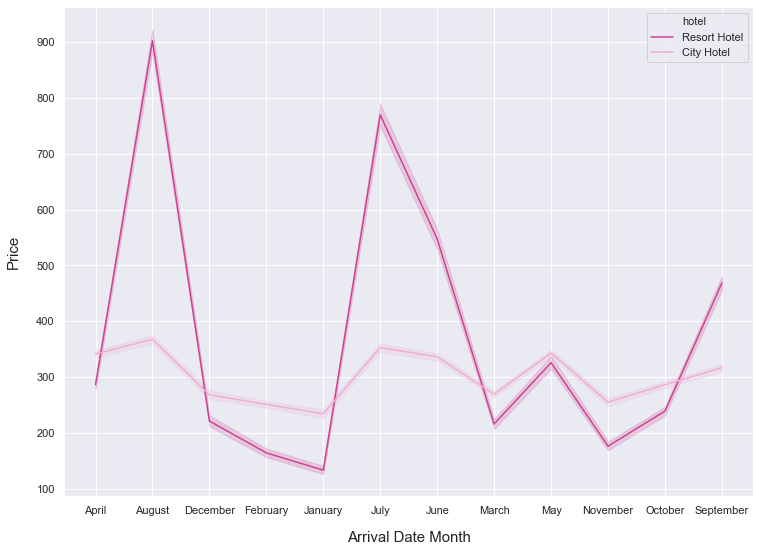

In [27]:
#graphing prices per month per hotel
#average daily rate = (sumOfAllLodgingTransaction/TotalNumberOfStayingNight)
#average daily rate per person = (ADR/Adults+Children)

# Resizing plot 
sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')
sns.set(palette='PiYG')

# Calculating average daily rate per person
df_hotel['adr_pp'] = df_hotel['adr'] / (df_hotel['adults'] + df_hotel['children']) 
actual_guests = df_hotel.loc[df_hotel["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')

plt.xlabel("Arrival Date Month", labelpad = 15, fontsize=15)
plt.ylabel("Price", labelpad = 15, fontsize=15);
#plt.title("Graph showing type of guest", fontsize=20)


=> Prices of the resort hotel are typically higher than the city hotel, with highest rates during busy months of travel in the summer, ie. August, June, and July.

<h2>Density Curve of Lead Time by Cancelation</h2>

Text(0.5, 22.95999999999998, 'Lead Time')

<Figure size 792x648 with 0 Axes>

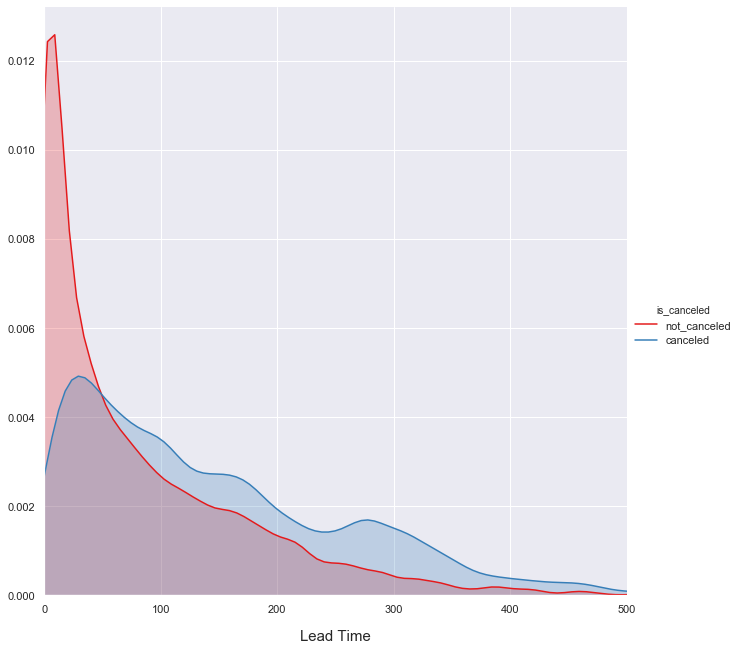

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')
sns.set(palette='Set1')

(sns.FacetGrid(df_hotel, hue = 'is_canceled',
             height = 9,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());

plt.xlabel("Lead Time", labelpad = 15, fontsize=15)


=> While lead time is more than roughly 60, people tend to cancel their reservations (cancellation rate is higher after this point). Also people want their holiday or work plans resulted in 100 days which equals to half of the data.

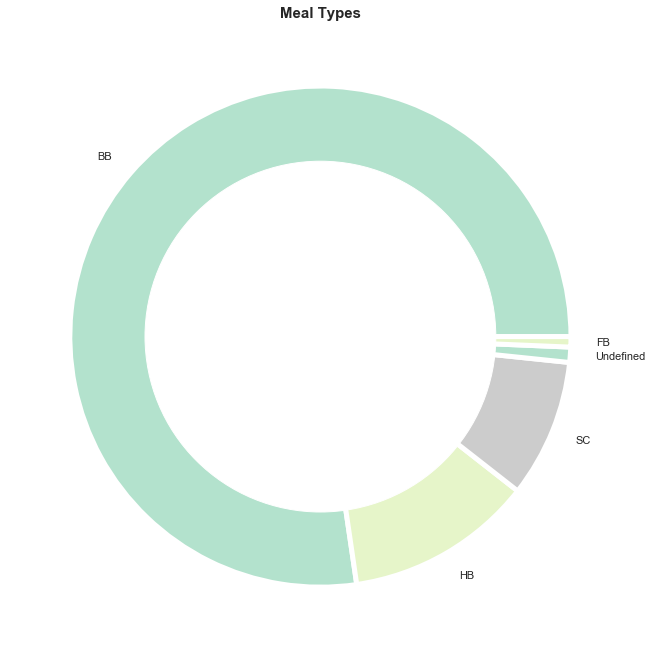

In [29]:
## Meal
meal_labels= ['BB','HB', 'SC', 'Undefined', 'FB']
size = df_hotel['meal'].value_counts()

plt.figure(figsize=(10,12))
cmap =plt.get_cmap("Pastel2")

colors = cmap(np.arange(3)*4)
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=meal_labels, colors=colors, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Meal Types', weight='bold', fontsize=15)
plt.show()




<B>Meal value definitions:</B>
- BB - bed & breakfast
- HB - half board - breakfast and one other meal, usually dinner
- FB - beakfast, lunch and dinner
- Undefined/SC - no meal package


=> The donut pie graph shows the meal categories. There is a big difference in the Bed&Breakfast category and the others. Almost 80% of bookings reserved for Bed&Breakfast.

In [30]:
group_meal_data = df_hotel.groupby(['hotel','meal']).size().unstack(fill_value=0).transform(lambda x: x/x.sum())
group_meal_data.applymap('{:.2f}'.format)

meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,0.67,0.06,0.44,0.99,0.00
Resort Hotel,0.33,0.94,0.56,0.01,1.00


=> The above table shows frequency details about meal types according to the hotel types. Following the results, 67% of Bed&Breakfast booking made for City Hotel and almost every Full Board bookings made in the Resort Hotel

Text(0, 0.5, 'Count')

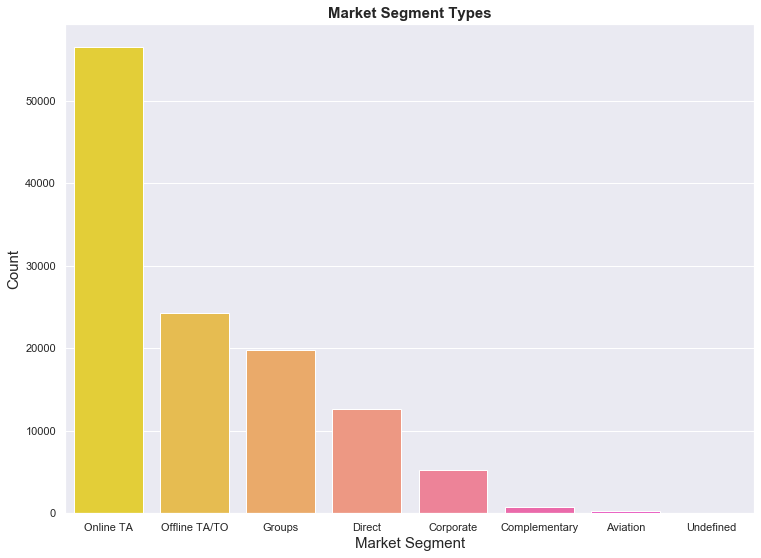

In [31]:
plt.figure(figsize=(11,9))
sns.countplot(df_hotel['market_segment'], palette='spring_r', 
              order=pd.value_counts(df_hotel['market_segment']).index)

plt.title('Market Segment Types', weight='bold',fontsize=15)
plt.xlabel('Market Segment', fontsize=15)
plt.ylabel('Count', fontsize=15)

<p>=> The statistics show that online hotel and airline reservations are increased in recent years. </p>
<p>=> Most people complete their reservation via their smartphones.</p> 
<p>=> The above graphs is summarise these statistics. More than 45% of bookings are made via Online Travel Agents and around 20% of bookings made via Offline Travel Agents. Less than 20% of bookings made directly without any agents.</p>

Text(0, 0.5, 'Count')

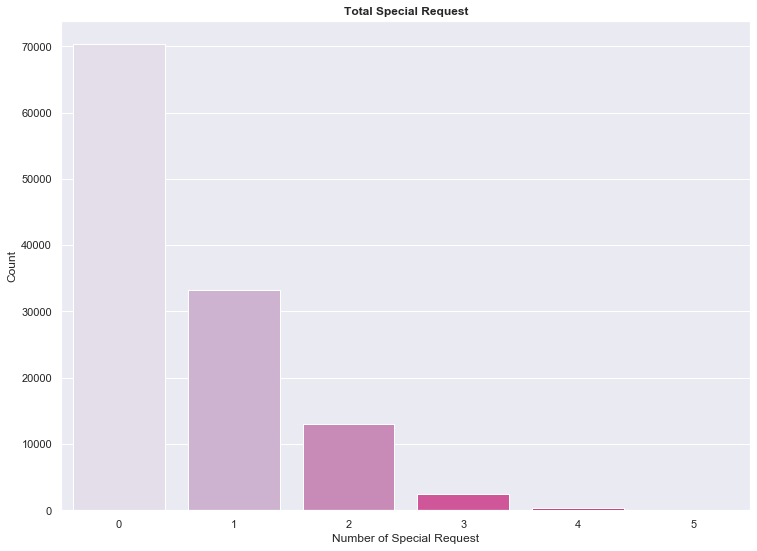

In [32]:
# Total of special requests
plt.figure(figsize=(11,9))

sns.countplot(x='total_of_special_requests', data=df_hotel, palette = 'PuRd')

plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.ylabel('Count', fontsize=12)

=> The below graph is about the relationship between special requests and cancellation booking status. Nearly half bookings without any special requests have been canceled and another half of them have not been canceled.

Text(0, 0.5, 'Count')

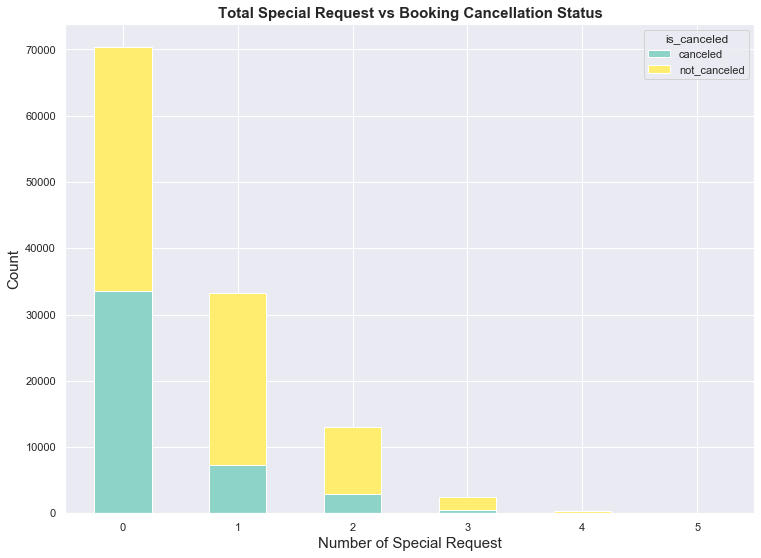

In [33]:
group_adr_request = df_hotel.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
group_adr_request.plot(kind='bar', stacked=True, cmap='Set3', figsize=(11,9))

plt.title('Total Special Request vs Booking Cancellation Status', weight='bold',fontsize=15)
plt.xlabel('Number of Special Request', fontsize=15)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=15)

In [34]:
# total bookings per market segment (incl. canceled)

segments=df_hotel["market_segment"].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

In [35]:
#Grouping by children to get summary statistics on hotel type
df_hotel['children'].groupby(df_hotel['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
Resort Hotel,40060.0,0.128682,0.445195,0.0,0.0,0.0,0.0,10.0


=> The data above shows us that on average, more children are booked into resort hotels.

<h2>How much do guests pay for a room per night?</h2>

In [36]:
replace_map = {'is_canceled': {'not_canceled': 0, 'canceled': 1}}
df_hotel.replace(replace_map, inplace=True)

In [37]:
rh = df_hotel.loc[(df_hotel["hotel"] == "Resort Hotel") & (df_hotel["is_canceled"] == 0)]
ch = df_hotel.loc[(df_hotel["hotel"] == "City Hotel") & (df_hotel["is_canceled"] == 0)]

In [38]:
# Counting adults and children as paying guests only, not babies.
rh["adr_pp"] = rh["adr"] / (rh["adults"] + rh["children"])
ch["adr_pp"] = ch["adr"] / (ch["adults"] + ch["children"])

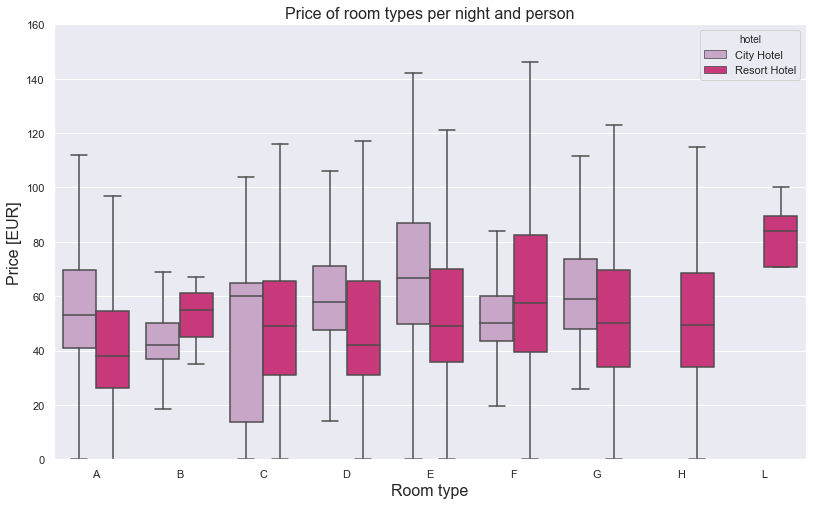

In [39]:
# normalize price per night (adr):
df_hotel["adr_pp"] = df_hotel["adr"] / (df_hotel["adults"] + df_hotel["children"])
full_data_guests = df_hotel.loc[df_hotel["is_canceled"] == 0] # only actual gusts
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))

sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0,
           palette = 'PuRd')
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
#plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

<p>=> Both hotels have different room types and different meal arrangements.</p>
<p>=> Seasonal factors are also important. So the prices vary a lot.</p>
<ul>From all non-cnceled bookings, across all room types and meals, the average prices are:
<li>Resort hotel: 47 € per night and person.</li>
<li>City hotel: 59 € per night and person.</li>
</ul>

In [40]:
# Create a DateFrame with the relevant data:
rh["total_nights"] = rh["stays_in_weekend_nights"] + rh["stays_in_week_nights"]
ch["total_nights"] = ch["stays_in_weekend_nights"] + ch["stays_in_week_nights"]

num_nights_res = list(rh["total_nights"].value_counts().index)
num_bookings_res = list(rh["total_nights"].value_counts())
rel_bookings_res = rh["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

num_nights_cty = list(ch["total_nights"].value_counts().index)
num_bookings_cty = list(ch["total_nights"].value_counts())
rel_bookings_cty = ch["total_nights"].value_counts() / sum(num_bookings_cty) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

<h2>How long do people stay at the hotels?</h2>

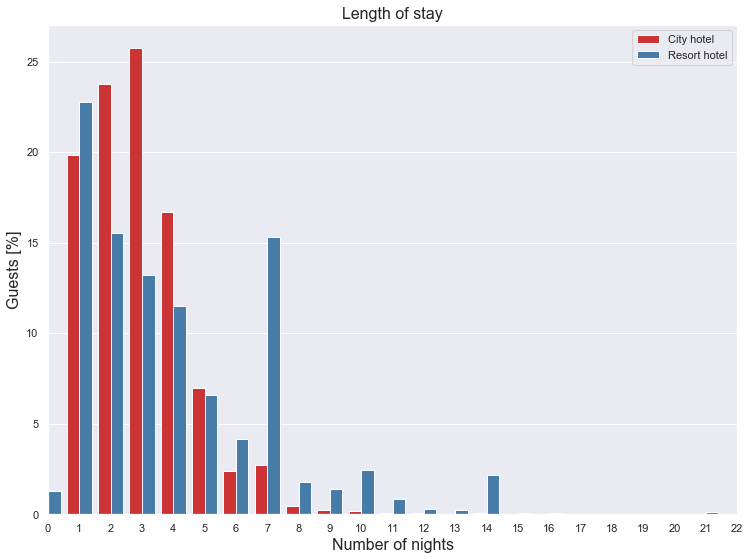

In [41]:
#show figure:

sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')
sns.set(palette='Set1')

sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])

plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

<p>=> For the city hotel there is a clear preference for 1-4 nights.</p>
<p>=> For the resort hotel, 1-4 nights are also often booked, but 7 nights also stand out as being very popular.</p>


In [42]:
avg_nights_res = sum(list((res_nights["num_nights"] * (res_nights["rel_num_bookings"]/100)).values))
avg_nights_cty = sum(list((cty_nights["num_nights"] * (cty_nights["rel_num_bookings"]/100)).values))
print(f"On average, guests of the City hotel stay {avg_nights_cty:.2f} nights, and {cty_nights['num_nights'].max()} at maximum.")
print(f"On average, guests of the Resort hotel stay {avg_nights_res:.2f} nights, and {res_nights['num_nights'].max()} at maximum.")

On average, guests of the City hotel stay 2.92 nights, and 57 at maximum.
On average, guests of the Resort hotel stay 4.14 nights, and 69 at maximum.


<p>=> For the city hotel there is a clear preference for 1-4 nights.</p>
<p>=> For the resort hotel, 1-4 nights are also often booked, but 7 nights also stand out as being very popular.</p>

In [43]:
# absolute cancelations:
rh = df_hotel.loc[(df_hotel["hotel"] == "Resort Hotel") & (df_hotel["is_canceled"] == 1)]
ch = df_hotel.loc[(df_hotel["hotel"] == "City Hotel") & (df_hotel["is_canceled"] == 1)]

total_cancelations = df_hotel["is_canceled"].sum()
rh_cancelations = rh.loc[rh["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancelations = ch.loc[ch["hotel"] == "City Hotel"]["is_canceled"].sum()

# as percent:
rel_cancel = total_cancelations / df_hotel.shape[0] * 100
rh_rel_cancel = rh_cancelations / rh.loc[rh["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = ch_cancelations / ch.loc[ch["hotel"] == "City Hotel"].shape[0] * 100

print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {rh_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {ch_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total bookings canceled: 44,224 (37 %)
Resort hotel bookings canceled: 11,122 (100 %)
City hotel bookings canceled: 33,102 (100 %)


<h2>Other Observations</h2>
<ul>
    <li> People usually made booking three months ahead of their arrival time.</li>
    <li>Almost 80% of bookings reserved for Bed&Breakfast. </li>
    <li>67% of Bed&Breakfast booking made for City Hotel and almost every Full Board bookings made in the Resort Hotel. </li>
    <li>More than 45% of bookings are made via Online Travel Agents and less than 20% of bookings made directly without any agents. </li>
    <li>Half bookings without any special requests have been canceled and another half of them have not been canceled. </li>
    <li>More children are booked into resort hotels.</li>
</ul>

<h3>Data Exploration</h3>

- <p>Let's first have a look at the dataset and let's try to get an essence of the information it contains.</p>

In [44]:
df = original_dataset.copy()

In [45]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


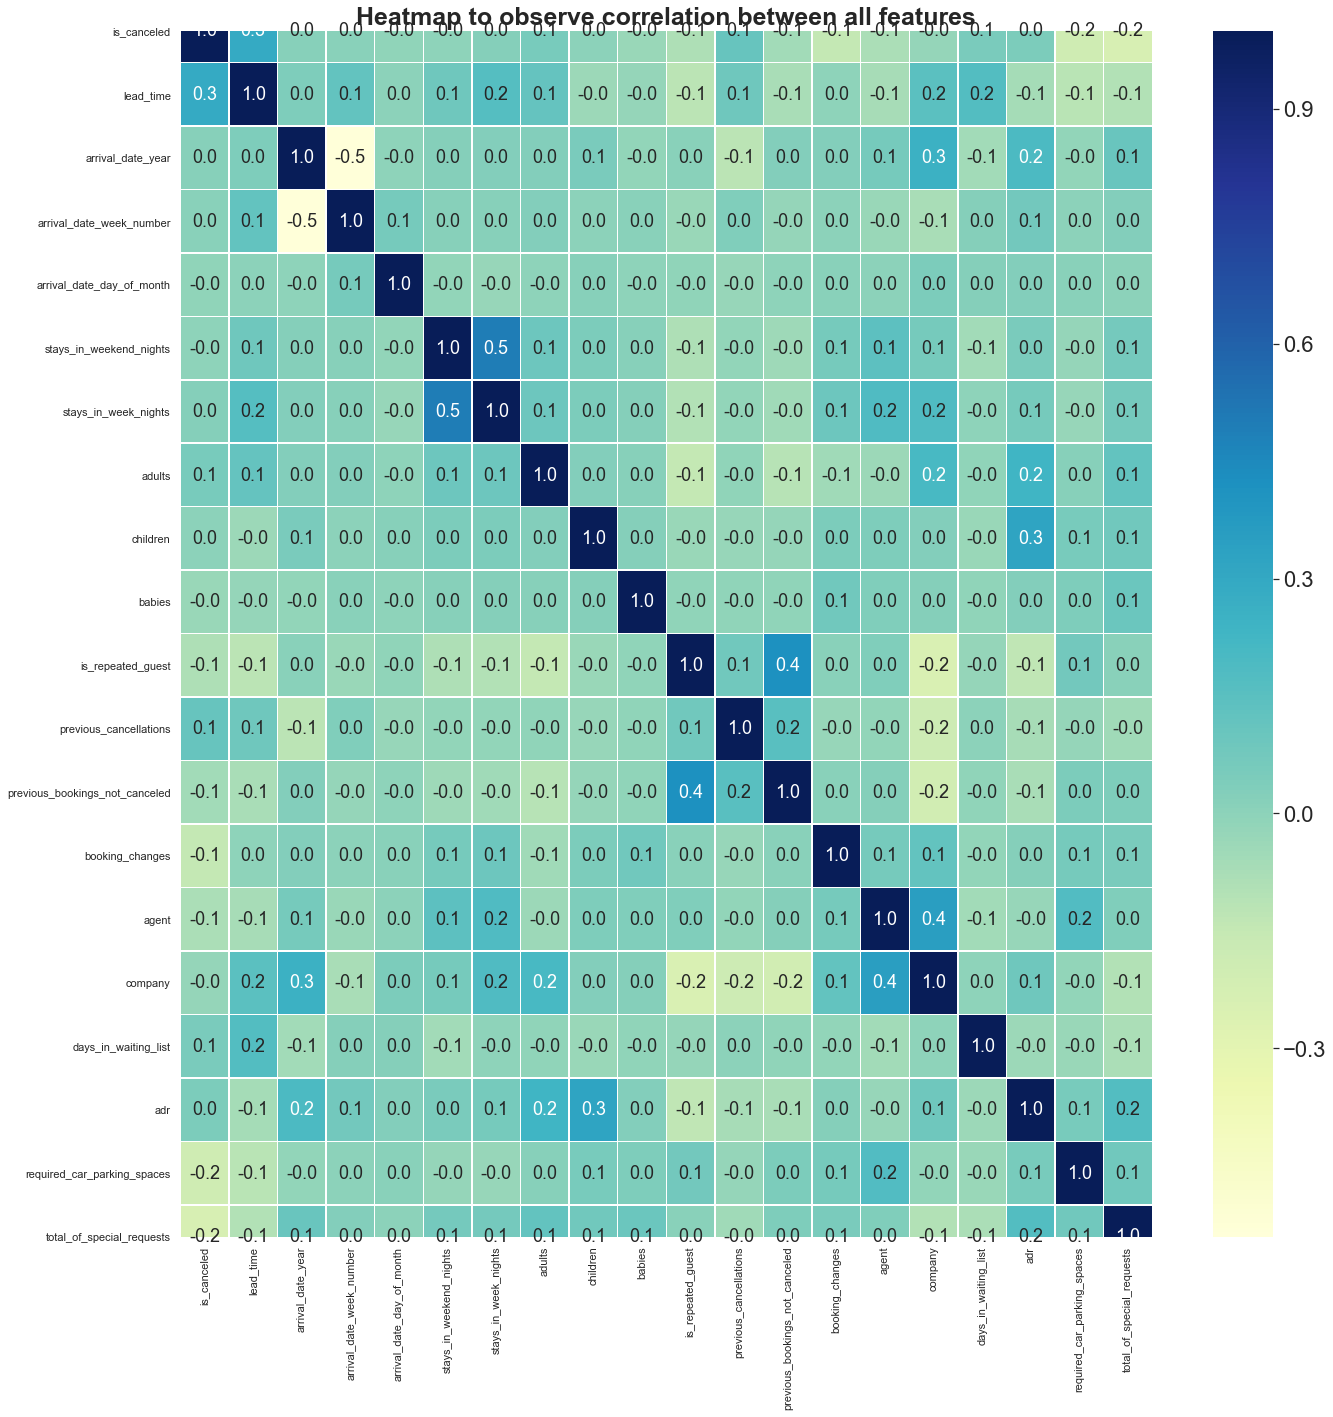

In [46]:
f,ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=2)
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu", annot_kws={"size":18})

plt.tight_layout()
plt.title('Heatmap to observe correlation between all features', y=2, fontsize=25, weight='bold')
plt.show()


#### Checking Null Values

In [47]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [48]:
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

print('Missing value ratios:\nCompany: {}\nAgent: {}\nCountry: {}'.format(perc_mv(df, df['company']),
                                                                                   perc_mv(df, df['agent']),
                                                                                   perc_mv(df, df['country'])))

Missing value ratios:
Company: 94.30689337465449
Agent: 13.686238378423655
Country: 0.40874445095904177


- As we can see 94.3% of company column are missing values. Therefore we do not have enough values to fill the rows of company column by predicting, filling by mean etc. It seems that the best option is dropping company column.

- 13.68% of agent column are missing values, there is no need to drop agent column. But also we should not drop the rows because 13.68% of data is really huge amount and those rows have the chance to have crucial information. There are 333 unique agent, since there are too many agents they may not be predictable. Also NA values can be the agents that are not listed in present 333 agents. We can't predict agents and since missing values are 13% of all data we can't drop them too. I will decide what to do about agent after correlation section.

- It will not be a problem if we drop the rows that have missing values in country column. Still, I will wait for correlation.

In [49]:
#We decided to dropped the below columns because this columns had the 
#same information which is present in other columns 


df.drop(inplace=True, axis=1, labels=['adults','company', 'babies','deposit_type','reservation_status_date'])

In [50]:
# We have also 4 missing values in children column. If there is no information about children, In my opinion 
#those customers do not have any children

df['children'] = df['children'].fillna(0)

- <p>Checking for missing values</p>

In [51]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
children                              0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
agent                             16340
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0


In [52]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'children', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [53]:
df.fillna(df.mode().iloc[0], inplace=True)

In [54]:
enc = LabelEncoder()
df.loc[:,['hotel','reservation_status','country','reserved_room_type','arrival_date_month','meal','market_segment','distribution_channel','assigned_room_type','customer_type','reservation_status']] = df.loc[:,['hotel','reservation_status','country','reserved_room_type','arrival_date_month','meal', 'market_segment','distribution_channel','assigned_room_type','customer_type','reservation_status']].apply(enc.fit_transform)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,children,...,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,2015,5,27,1,0,0,0.0,...,2,2,3,9.0,0,2,0.0,0,0,1
1,1,0,737,2015,5,27,1,0,0,0.0,...,2,2,4,9.0,0,2,0.0,0,0,1
2,1,0,7,2015,5,27,1,0,1,0.0,...,0,2,0,9.0,0,2,75.0,0,0,1
3,1,0,13,2015,5,27,1,0,1,0.0,...,0,0,0,304.0,0,2,75.0,0,0,1
4,1,0,14,2015,5,27,1,0,2,0.0,...,0,0,0,240.0,0,2,98.0,0,1,1


<h3>Feature Selection</h3>

- <i>It helps to identify the import features from the dataset</i>

In [55]:
df.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,children,...,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
hotel,1.000000,-0.136531,-0.075381,-0.035267,-0.035378,-0.001270,0.001862,0.186596,0.234020,0.044210,...,0.249677,0.307834,0.072820,0.660150,-0.072432,-0.047531,-0.096719,0.218873,0.043390,0.124331
is_canceled,-0.136531,1.000000,0.293123,0.016660,-0.001491,0.008148,-0.006130,-0.001791,0.024765,0.005036,...,-0.061282,-0.176028,-0.144381,-0.049857,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196
lead_time,-0.075381,0.293123,1.000000,0.040142,0.086228,0.126871,0.002268,0.085671,0.165799,-0.037613,...,-0.106089,-0.172219,0.000149,-0.017975,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175
arrival_date_year,-0.035267,0.016660,0.040142,1.000000,-0.251837,-0.540561,-0.000221,0.021497,0.030883,0.054636,...,0.092809,0.036141,0.030872,0.056905,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683
arrival_date_month,-0.035378,-0.001491,0.086228,-0.251837,1.000000,0.302228,-0.017938,-0.031869,-0.025746,-0.082862,...,-0.062791,-0.038134,-0.017854,-0.040803,0.048357,0.012029,-0.109004,-0.018589,-0.053047,-0.001611
arrival_date_week_number,-0.001270,0.008148,0.126871,-0.540561,0.302228,1.000000,0.066809,0.018208,0.015558,0.005515,...,-0.007997,-0.005684,0.005508,-0.019320,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387
arrival_date_day_of_month,0.001862,-0.006130,0.002268,-0.000221,-0.017938,0.066809,1.000000,-0.016354,-0.028174,0.014553,...,0.016929,0.011646,0.010613,0.000321,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460
stays_in_weekend_nights,0.186596,-0.001791,0.085671,0.021497,-0.031869,0.018208,-0.016354,1.000000,0.498969,0.045794,...,0.142083,0.086643,0.063281,0.158992,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558
stays_in_week_nights,0.234020,0.024765,0.165799,0.030883,-0.025746,0.015558,-0.028174,0.498969,1.000000,0.044203,...,0.168616,0.100795,0.096209,0.193228,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607
children,0.044210,0.005036,-0.037613,0.054636,-0.082862,0.005515,0.014553,0.045794,0.044203,1.000000,...,0.378064,0.327644,0.048952,0.049641,-0.033271,-0.053400,0.324853,0.056255,0.081736,-0.003399


In [56]:
df.corr()["is_canceled"].sort_values()

reservation_status               -0.917196
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
assigned_room_type               -0.176028
booking_changes                  -0.144381
hotel                            -0.136531
is_repeated_guest                -0.084793
customer_type                    -0.068140
reserved_room_type               -0.061282
previous_bookings_not_canceled   -0.057358
agent                            -0.049857
meal                             -0.017678
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
arrival_date_month               -0.001491
children                          0.005036
arrival_date_week_number          0.008148
arrival_date_year                 0.016660
stays_in_week_nights              0.024765
adr                               0.047557
days_in_waiting_list              0.054186
market_segment                    0.059338
previous_cancellations            0.110133
distributio

[9.22927420e-03 2.27308865e-02 4.45755697e-03 1.98697314e-03
 2.59884716e-03 1.84229440e-03 1.95479797e-03 2.45262339e-03
 7.82505982e-04 2.75516371e-03 4.33467143e-02 1.41251186e-02
 1.35763001e-02 3.27927419e-03 7.12798520e-03 4.99146999e-04
 2.64865263e-03 7.54042186e-03 3.20895416e-03 4.25253590e-03
 1.40321643e-03 1.10610112e-02 3.33012345e-03 8.85188069e-03
 2.06089724e-02 8.04348768e-01]


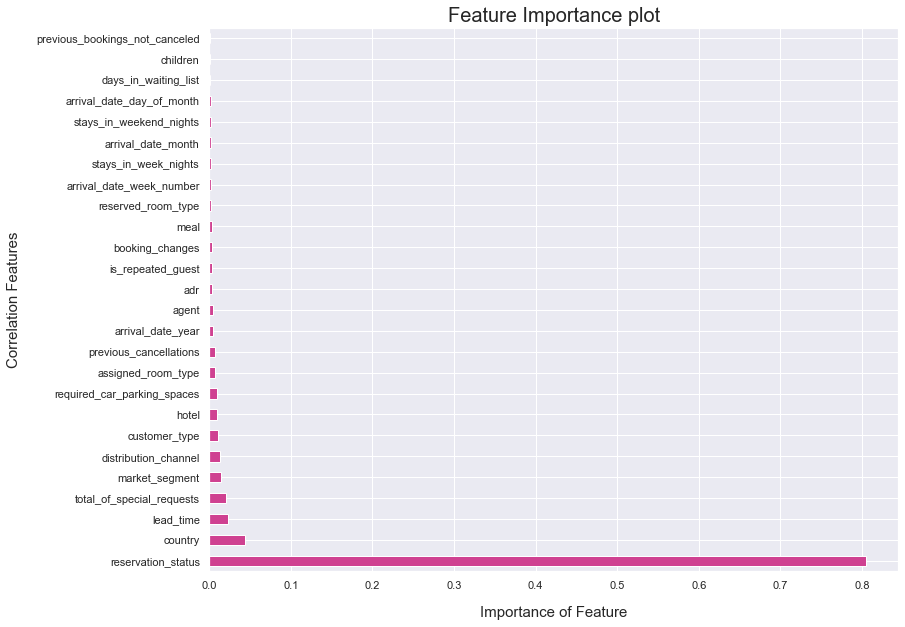

In [57]:
X =df.iloc[:,df.columns != 'is_canceled' ]
y =df.is_canceled
# feature extraction
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
sns.set_style('whitegrid')
plt.figure(figsize=(11,10))
sns.set(style='whitegrid')
sns.set(palette='PiYG')


feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(27).plot(kind='barh')

plt.xlabel("Importance of Feature", labelpad = 15, fontsize=15)
plt.ylabel("Correlation Features", labelpad = 15, fontsize=15);
plt.title("Feature Importance plot", fontsize=20)

plt.show()

In [58]:
df.corr()['stays_in_week_nights']

hotel                             0.234020
is_canceled                       0.024765
lead_time                         0.165799
arrival_date_year                 0.030883
arrival_date_month               -0.025746
arrival_date_week_number          0.015558
arrival_date_day_of_month        -0.028174
stays_in_weekend_nights           0.498969
stays_in_week_nights              1.000000
children                          0.044203
meal                              0.036742
country                          -0.121158
market_segment                    0.108569
distribution_channel              0.087185
is_repeated_guest                -0.097245
previous_cancellations           -0.013992
previous_bookings_not_canceled   -0.048743
reserved_room_type                0.168616
assigned_room_type                0.100795
booking_changes                   0.096209
agent                             0.193228
days_in_waiting_list             -0.002020
customer_type                    -0.127223
adr        

In [59]:
df = df.drop(columns = ['arrival_date_week_number', 'stays_in_weekend_nights', 
                        'arrival_date_month', 'agent'], axis = 1)

In [60]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_day_of_month         0
stays_in_week_nights              0
children                          0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
dtype: int64

In [61]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'children', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status'],
      dtype='object')

<h1>Decision Tree Model (reservation_status included)</h1>

In [62]:
X = df.drop(["is_canceled"], axis=1)
y = df["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [63]:
DTC = DecisionTreeClassifier(max_depth = 12)

In [64]:
DTC_model = DTC.fit(X_train, y_train)

In [65]:
y_pred = DTC.predict(X_test)
y_prob = DTC_model.predict_proba(X_test)[:,1]

In [66]:
print('Accuracy Score: {}'
      .format(accuracy_score(y_test,y_pred)))

Accuracy Score: 1.0


In [67]:
cv_score_DCT = cross_val_score(DTC, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_score_DCT.mean())

Mean Score of CV:  1.0


In [68]:
#Cross validation prediction
cv_pred = cross_val_predict(DTC,X_test,y_test,cv=5)
#Cross validation score
cv_score = cross_val_score(DTC,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 1.0


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22478
           1       1.00      1.00      1.00     13339

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



In [70]:
confusion_matrix_DTC = confusion_matrix(y_test, y_pred)
print(confusion_matrix_DTC)

[[22478     0]
 [    0 13339]]


Text(34.1, 0.5, 'Actual label')

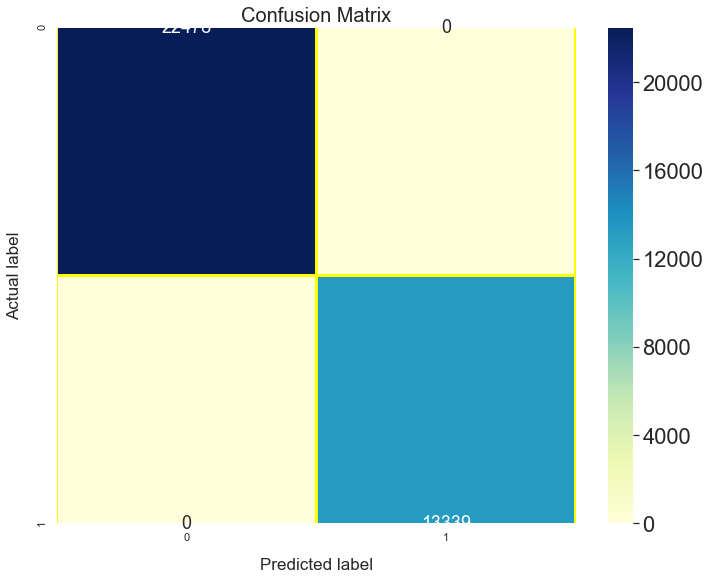

In [71]:
#heatmap 
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(confusion_matrix_DTC),  cmap="YlGnBu", annot=True,fmt="d", linewidths=2, linecolor='yellow',annot_kws={"size":18})


plt.tight_layout()
plt.title('Confusion Matrix', y=1.5, fontsize=20)
plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', labelpad = 15, fontsize=17)


ROC score is: 1.0


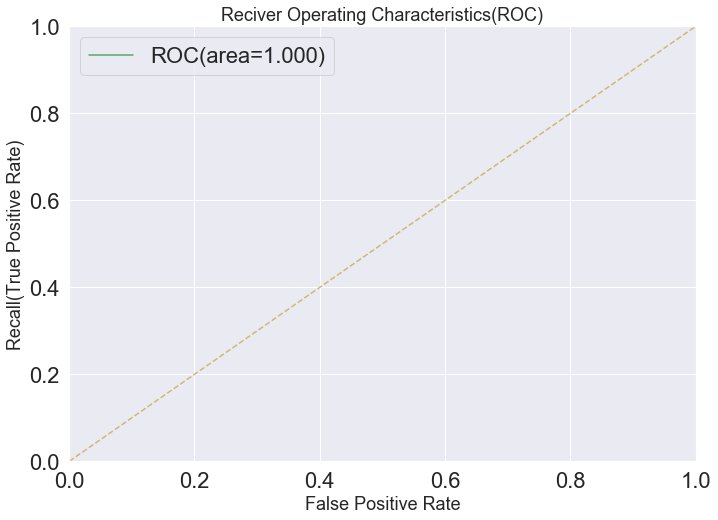

AUC: 1.0


In [72]:
#ROC_AUC curve

roc_score = roc_auc_score(y_test,y_prob)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_prob)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

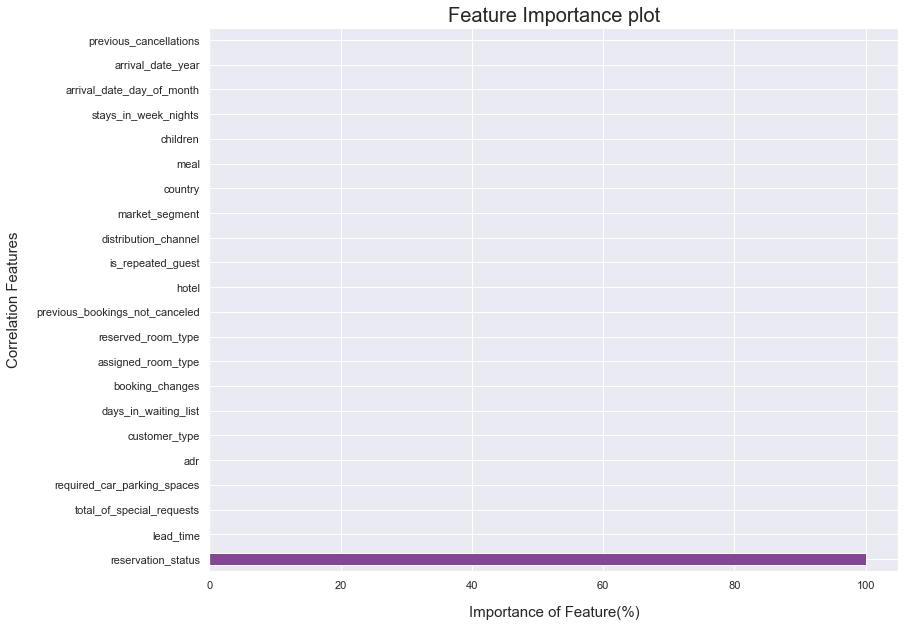

In [73]:
#plot graph of feature importances for better visualization
sns.set_style('whitegrid')
plt.figure(figsize=(11,10))
sns.set(style='whitegrid')
sns.set(palette='PRGn')


feat_importances = pd.Series(DTC_model.feature_importances_*100, index=X_train.columns)
feat_importances.nlargest(27).plot(kind='barh')

plt.xlabel("Importance of Feature(%)", labelpad = 15, fontsize=15)
plt.ylabel("Correlation Features", labelpad = 15, fontsize=15);
plt.title("Feature Importance plot", fontsize=20)

plt.show()

- As the accuracy is exactly 100%, lets perform the model operations without reservation_status column.

- As shown in above graph, reservation status dominates other features totally. By keeping reservation_status in data, it is possible to achieve 100% accuracy rate because that feature is directly connected to predict cancellations.

- For the sake of analysis, we will drop reservation_status and continue analysis without it.

<h2>Final sorting before comparing the models:</h2>

In [74]:
df1 = df.drop(columns = ['reservation_status'], axis=1)

<h1>Decission Tree Model (reservation_status excluded)</h1>

- <i>Now, set the independent variables (represented as X) and the dependent variable (represented as y):</i>

In [75]:
X = df1.drop(["is_canceled"], axis=1)
y = df1["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [76]:
DTC1 = DecisionTreeClassifier(max_depth = 12)

In [77]:
DTC1_model_1 = DTC1.fit(X_train, y_train)

In [78]:
y_pred = DTC1_model_1.predict(X_test)
y_prob = DTC1_model_1.predict_proba(X_test)[:,1]

In [79]:
print('Accuracy Score: {}'
      .format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8498478376190077


In [80]:
cv_score_DCT1 = cross_val_score(DTC1, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_score_DCT1.mean())

Mean Score of CV:  0.6633046023504953


In [81]:
#Cross validation prediction
cv_pred = cross_val_predict(DTC1,X_test,y_test,cv=5)
#Cross validation score
cv_score = cross_val_score(DTC1,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.8397405965094682


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     22478
           1       0.81      0.78      0.79     13339

    accuracy                           0.85     35817
   macro avg       0.84      0.83      0.84     35817
weighted avg       0.85      0.85      0.85     35817



In [83]:
confusion_matrix_DTC1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_DTC1)

[[20079  2399]
 [ 2979 10360]]


Text(34.1, 0.5, 'Actual label')

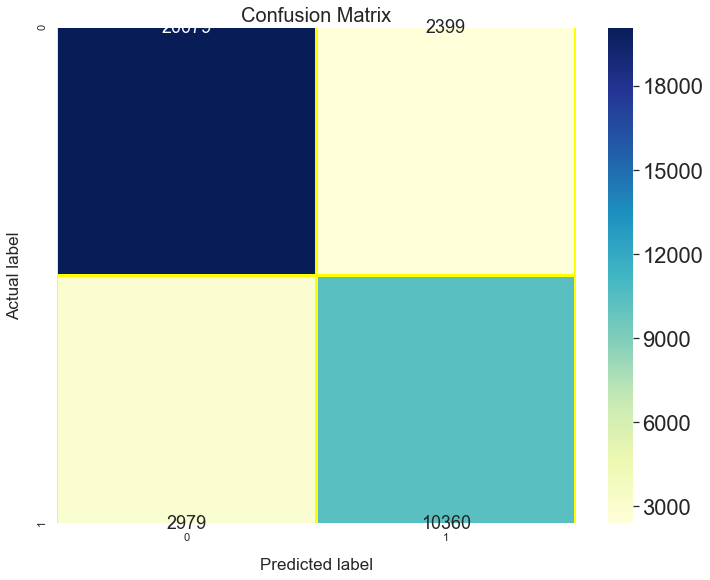

In [84]:
#heatmap 
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(confusion_matrix_DTC1),  cmap="YlGnBu", annot=True,fmt="d", linewidths=2, linecolor='yellow',annot_kws={"size":18})


plt.tight_layout()
plt.title('Confusion Matrix', y=1.5, fontsize=20)
plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', labelpad = 15, fontsize=17)


ROC score is: 0.9197005772279854


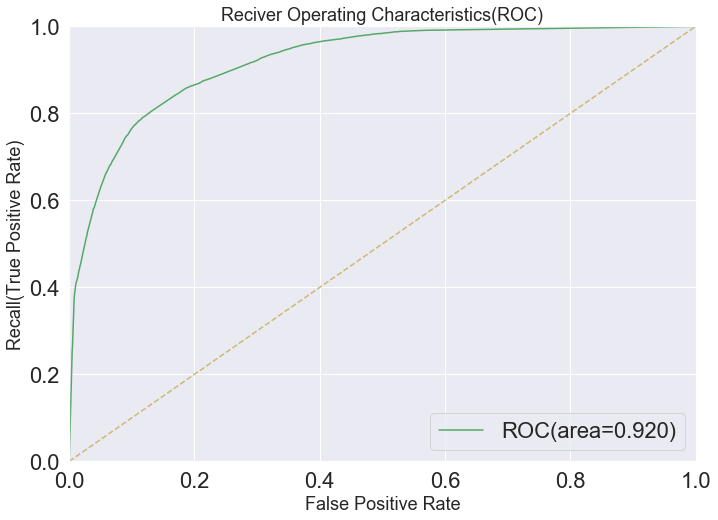

AUC: 0.9197005772279854


In [85]:
#ROC_AUC curve

roc_score = roc_auc_score(y_test,y_prob)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_prob)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

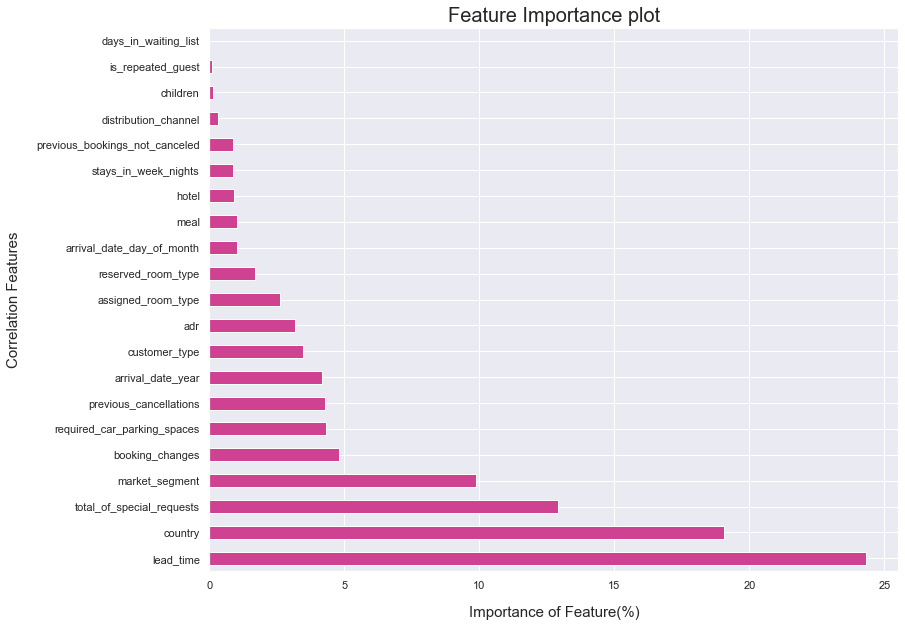

In [86]:
#plot graph of feature importances for better visualization
sns.set_style('whitegrid')
plt.figure(figsize=(11,10))
sns.set(style='whitegrid')
sns.set(palette='PiYG')


feat_importances = pd.Series(DTC1_model_1.feature_importances_*100, index=X_train.columns)
feat_importances.nlargest(27).plot(kind='barh')

plt.xlabel("Importance of Feature(%)", labelpad = 15, fontsize=15)
plt.ylabel("Correlation Features", labelpad = 15, fontsize=15);
plt.title("Feature Importance plot", fontsize=20)

plt.show()

<p>=> By keeping reservation_status in data, it is possible to achieve 100% accuracy rate because that feature is directly related to predict cancellations. </p>
<p>=> For the sake of analysis we dropped reservation_status and continue analysis without it.</p>

<h2> Performing Logistic Regression:</h2>

<b>Liblinear </b>

 - Accuracy,

 - Mean score,
    
 - Cross validation,

 - Confusion Matrix and

 - ROC

<h2>Logistic Regression Model</h2>

In [87]:
X = np.array(df1.loc[:, df1.columns != 'is_canceled'])
y = np.array(df1.loc[:, df1.columns == 'is_canceled'])


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [89]:
#Logistic Regression using liblinear

logreg_1 = LogisticRegression(solver = "liblinear")
logreg_1.fit(X_train, y_train)
y_pred = logreg_1.predict(X_test)
y_prob = logreg_1.predict_proba(X_test)[:,1]

In [90]:
print('Accuracy Score: {}\n'
      .format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.7805790546388587



In [91]:
cv_score_logreg_1 = cross_val_score(logreg_1, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_score_logreg_1.mean())

Mean Score of CV:  0.738529789401551


In [92]:
#Cross validation prediction
cv_pred = cross_val_predict(logreg_1,X_test,y_test,cv=5)
#Cross validation score
cv_score = cross_val_score(logreg_1,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.7796855630939845


In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     22478
           1       0.75      0.62      0.68     13339

    accuracy                           0.78     35817
   macro avg       0.77      0.75      0.76     35817
weighted avg       0.78      0.78      0.78     35817



In [94]:
confusion_matrix_logreg_1 = confusion_matrix( y_test, y_pred )
print(confusion_matrix_logreg_1)

[[19664  2814]
 [ 5045  8294]]


Text(34.1, 0.5, 'Actual label')

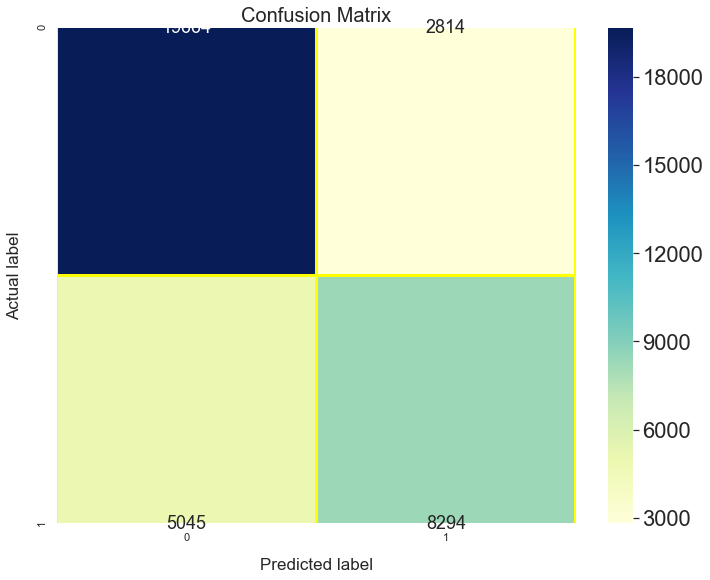

In [95]:
#heatmap 
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(confusion_matrix_logreg_1),  cmap="YlGnBu", annot=True,fmt="d", linewidths=2, linecolor='yellow',annot_kws={"size":18})


plt.tight_layout()
plt.title('Confusion Matrix', y=1.5, fontsize=20)
plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', labelpad = 15, fontsize=17)


<h4>Reciever operating characteristics (ROC)-Area under curve(AUC) score and curve</h4>


ROC score is: 0.8432502504168624


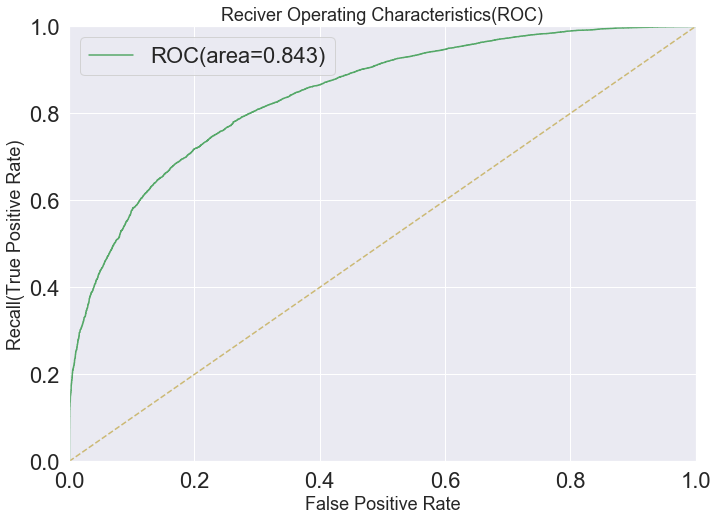

AUC: 0.8432502504168624


In [96]:
#ROC_AUC curve
roc_score = roc_auc_score(y_test,y_prob)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_prob)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

<b>LBFS</b>

 - Accuracy,

 - Mean score,
    
 - Cross validation,

 - Confusion Matrix and

 - ROC

In [97]:
# logistic LBFGS

logreg_2 = LogisticRegression(solver = 'lbfgs')
logreg_2.fit( X_train, y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
y_pred2 = logreg_2.predict( X_test )
y_prob = logreg_2.predict_proba(X_test)[:,1]


In [99]:
print('Accuracy Score: {}\n'
      .format(accuracy_score(y_test,y_pred2)))

Accuracy Score: 0.7428036965686685



In [100]:
cv_scores_logreg_2 = cross_val_score(logreg_2, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores_logreg_2.mean())

Mean Score of CV:  0.7123212736395979


In [101]:
#Cross validation prediction
cv_pred = cross_val_predict(logreg_2,X_test,y_test,cv=5)
#Cross validation score
cv_score = cross_val_score(logreg_2,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.7470196975851382


In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     22478
           1       0.75      0.62      0.68     13339

    accuracy                           0.78     35817
   macro avg       0.77      0.75      0.76     35817
weighted avg       0.78      0.78      0.78     35817



In [103]:
confusion_matrix_logreg_2 = confusion_matrix( y_test, y_pred2 )
print(confusion_matrix_logreg_2)

[[18875  3603]
 [ 5609  7730]]


Text(24.1, 0.5, 'Actual label')

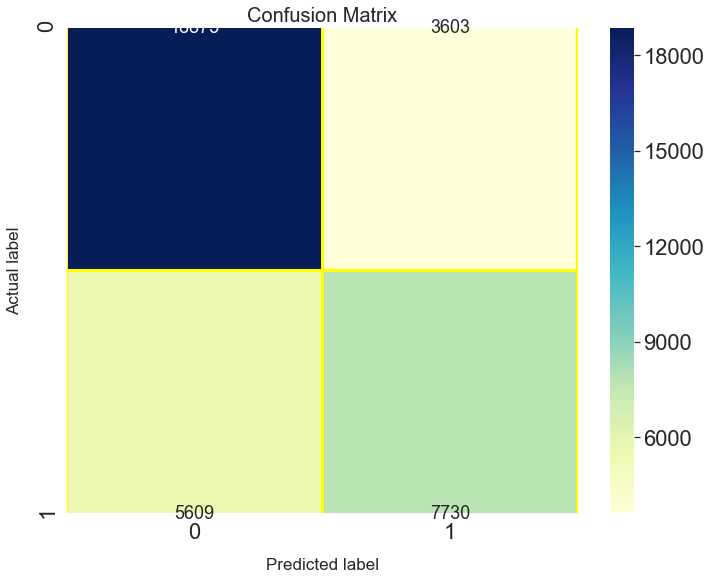

In [104]:
#heatmap 
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(confusion_matrix_logreg_2),  cmap="YlGnBu", annot=True,fmt="d", linewidths=2, linecolor='yellow',annot_kws={"size":18})


plt.tight_layout()
plt.title('Confusion Matrix', y=1.5, fontsize=20)
plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', labelpad = 15, fontsize=17)


ROC score is: 0.7936439618820867


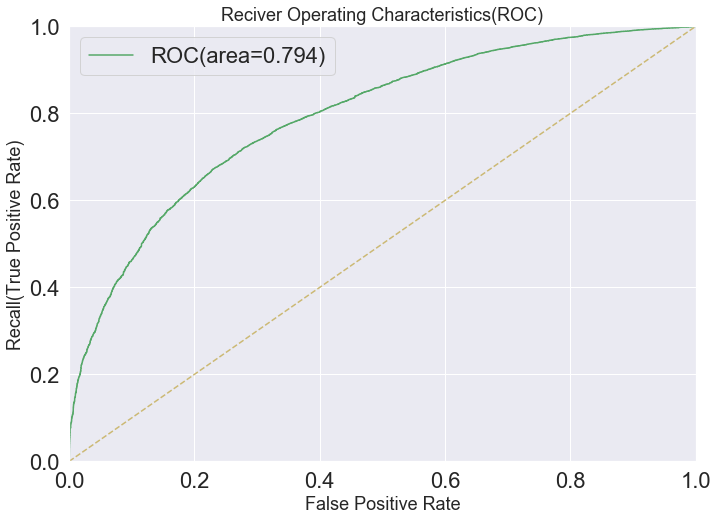

AUC: 0.7936439618820867


In [105]:
#ROC_AUC curve
roc_score = roc_auc_score(y_test,y_prob)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_prob)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

<h1>KNN Classification (reservation_status excluded)</h1>

In [106]:
X = df1.drop(["is_canceled"], axis=1)
y = df1["is_canceled"]

In [107]:
#splitting data into training and testing subsets(70:30 ratio)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [108]:
#fitting training data to the model
  
KNN = KNeighborsClassifier(n_neighbors=5)  
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [109]:
y_pred = KNN.predict(X_test)
y_prob = KNN.predict_proba(X_test)[:,1]

In [110]:
print('Accuracy Score: {}'
      .format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.7907976659128347


In [111]:
cv_scores_KNN = cross_val_score(KNN, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores_KNN.mean())

Mean Score of CV:  0.6397013839720751


In [112]:
#Cross validation prediction
cv_pred = cross_val_predict(KNN,X_test,y_test,cv=5)
#Cross validation score
cv_score = cross_val_score(KNN,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.763966625283646


In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     22478
           1       0.74      0.67      0.71     13339

    accuracy                           0.79     35817
   macro avg       0.78      0.77      0.77     35817
weighted avg       0.79      0.79      0.79     35817



In [114]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred)
print(confusion_matrix_knn)

[[19340  3138]
 [ 4355  8984]]


Text(24.1, 0.5, 'Actual label')

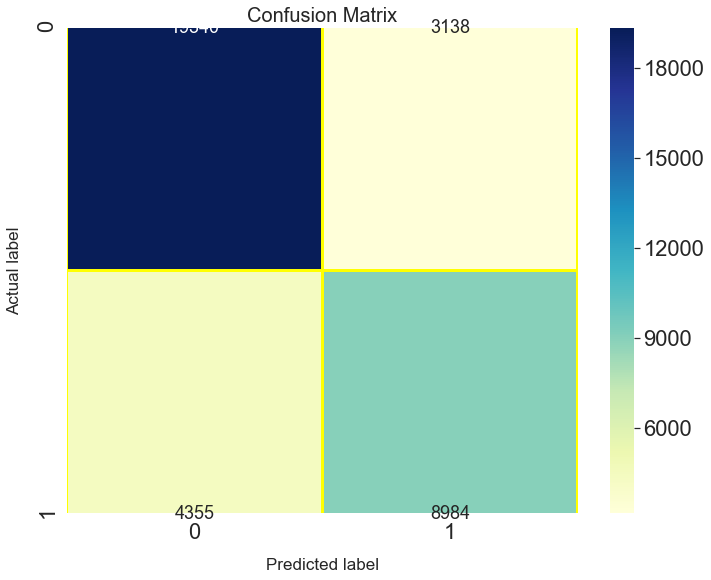

In [115]:
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(confusion_matrix_knn),  cmap="YlGnBu", annot=True,fmt="d", linewidths=2, linecolor='yellow',annot_kws={"size":18})

#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.5, fontsize=20)
plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', labelpad = 15, fontsize=17)

ROC score is: 0.8473141435354429


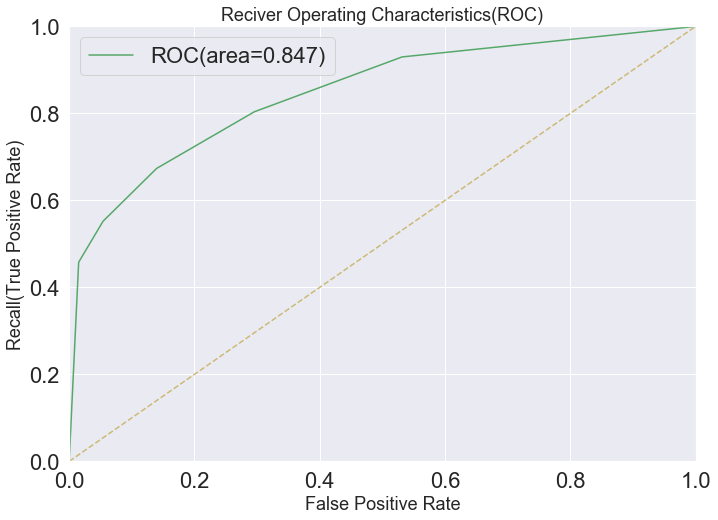

AUC: 0.8473141435354429


In [116]:
#ROC_AUC curve

roc_score = roc_auc_score(y_test,y_prob)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_prob)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

#### Choosing optimum K value

In [117]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

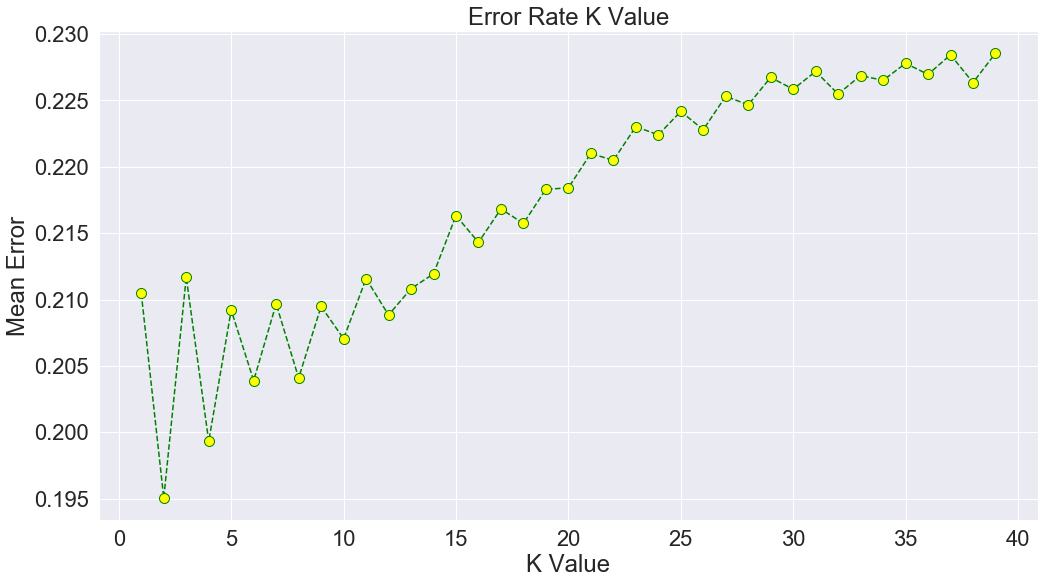

In [118]:
plt.figure(figsize=(15,9))  
plt.plot(range(1, 40), error, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 
plt.show()

#### Optimum K value is 3

In [119]:
KNN1 = KNeighborsClassifier(n_neighbors=3)  
KNN1.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [120]:
y_pred = KNN1.predict(X_test)
y_prob = KNN1.predict_proba(X_test)[:,1]

In [121]:
print('Accuracy Score: {}'
      .format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.7883128123516766


In [122]:
cv_scores_KNN1 = cross_val_score(KNN1, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores_KNN1.mean())

#cv_score = cross_val_score(logreg,X_test_res,y_test_res,cv=5)
#print('cross_val_score :',np.average(cv_score))

Mean Score of CV:  0.629248315659086


In [123]:
#Cross validation prediction
cv_pred = cross_val_predict(KNN1,X_test,y_test,cv=5)
#Cross validation score
cv_score = cross_val_score(KNN1,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.7630174465795402


In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83     22478
           1       0.73      0.69      0.71     13339

    accuracy                           0.79     35817
   macro avg       0.77      0.77      0.77     35817
weighted avg       0.79      0.79      0.79     35817



In [125]:
confusion_matrix_knn_k = confusion_matrix(y_test, y_pred)
print(confusion_matrix_knn_k)

[[19000  3478]
 [ 4104  9235]]


Text(24.1, 0.5, 'Actual label')

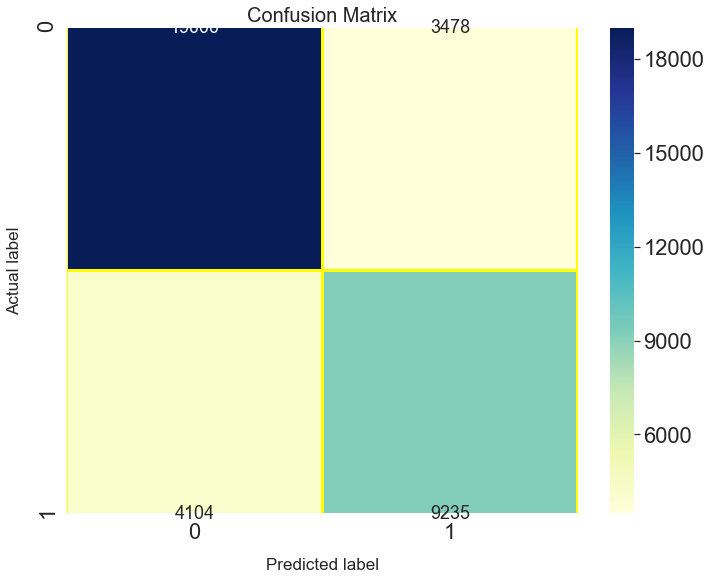

In [126]:
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(confusion_matrix_knn_k),  cmap="YlGnBu", annot=True,fmt="d", linewidths=2, linecolor='yellow',annot_kws={"size":18})

#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.5, fontsize=20)
plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', labelpad = 15, fontsize=17)

ROC score is: 0.8349417658852759


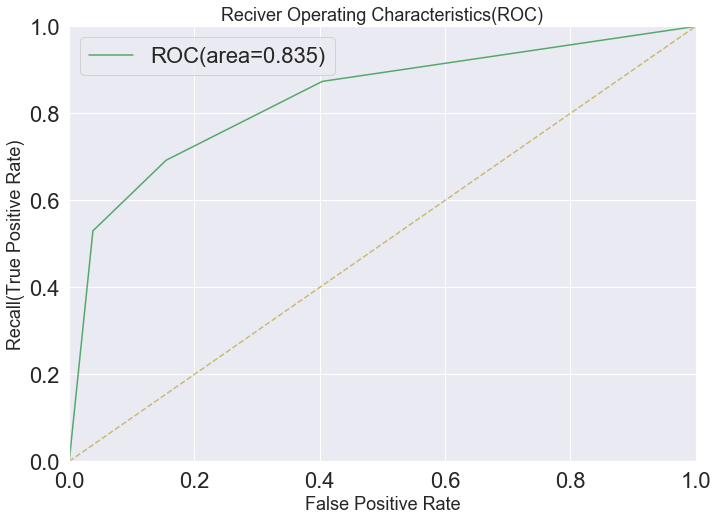

AUC: 0.8349417658852759


In [127]:
#ROC_AUC curve

roc_score = roc_auc_score(y_test,y_prob)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_prob)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

## Performing Regularization model with Lasso Regression:


*   Mean Square Error (MSE)

*   Residual Sum of Squares (RSS)
*   Akaike's Information Criterion (AIC)

*   Test with different alpha values

*   coefficient values

In [128]:
X = df1.drop(["is_canceled"], axis=1)
Y = df1["is_canceled"]

def lasso_regression(X_tr,Y_tr,alpha):
    lassoreg = Lasso(alpha=alpha, normalize=True,max_iter=1e6)
#Fit the model
    lassoreg.fit(X_tr,Y_tr)
    y_pred = lassoreg.predict(X_tr)

#Caluculating mse,rss and aic
    mse = mean_squared_error(Y_tr,y_pred)
    rss = mse*len(X)
    #Estimation with normally distributed errors know for AIC    
    aic = len(X)*np.log(mse) + 2*(len(X.columns)-1)
    ret = [rss]
    ret.extend([aic])
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

#coef_matrix_lasso = lasso_regression(X,Y,1e-15)


#Define the alpha values to test
alpha_lasso = [1e-15, 1e-6, 1e-5, 5e-5, 1e-4, 4e-4, 8e-4, 1e-3, 3e-3, 6e-3, 1e-2, .5e-1, 1, 5, 20]
k =15


#Initialize the dataframe to store coefficients
#Corresponding average estimated salary error w.r.t the rss and aic
x_var =  X.columns.tolist()
col = ['rss','aic','intercept'] + x_var

ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,k)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Iterate over the 10 alpha values:
for i in range(k):
  coef_matrix_lasso.iloc[i,] = lasso_regression(X,Y,alpha_lasso[i])

coef_matrix_lasso

,rss,aic,intercept,hotel,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,children,meal,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
alpha_1e-15,19892.1,-213915,-64.4365,-0.0532485,0.000950919,0.0319655,-0.000158641,0.00386561,0.02634,-0.00933121,...,0.0423833,-0.0059392,0.0457994,-0.0553668,-0.0602942,-0.000314319,-0.0734484,0.000739825,-0.233242,-0.124664
alpha_1e-06,19892.5,-213913,-63.4008,-0.0526332,0.000949825,0.031452,-0.000121817,0.00370834,0.0256864,-0.00898082,...,0.0419408,-0.00574666,0.0448942,-0.0545346,-0.060007,-0.000292145,-0.0730932,0.000739737,-0.232545,-0.124123
alpha_1e-05,19924.3,-213722,-54.0276,-0.0470367,0.000939992,0.0268063,-0,0.00225038,0.0197866,-0.00582763,...,0.0378963,-0.00400466,0.0368353,-0.0470988,-0.0573814,-9.02383e-05,-0.0698787,0.000739854,-0.22625,-0.119237
alpha_5e-05,20575,-209885,-12.3412,-0.0271523,0.000897584,0.00614357,-0,0,0,-0,...,0.0205479,-0,0,-0.0146278,-0.0465865,-0,-0.0512491,0.000736731,-0.196015,-0.0980954
alpha_0.0001,21611.4,-204019,0.101669,-0.0124771,0.000789218,0,-0,0,0,-0,...,0.00194287,-0,0,-0.00738837,-0.030445,-0,-0.0206698,0.000304671,-0.153278,-0.0729502
alpha_0.0004,27731.1,-174251,0.367163,-0,3.12793e-05,0,-0,0,0,-0,...,0,-0,-0,-0,-0,0,-0,0,-0,-0
alpha_0.0008,27842.7,-173771,0.370416,-0,0,0,-0,0,0,-0,...,0,-0,-0,-0,-0,0,-0,0,-0,-0
alpha_0.001,27842.7,-173771,0.370416,-0,0,0,-0,0,0,-0,...,0,-0,-0,-0,-0,0,-0,0,-0,-0
alpha_0.003,27842.7,-173771,0.370416,-0,0,0,-0,0,0,-0,...,0,-0,-0,-0,-0,0,-0,0,-0,-0
alpha_0.006,27842.7,-173771,0.370416,-0,0,0,-0,0,0,-0,...,0,-0,-0,-0,-0,0,-0,0,-0,-0


In [129]:
# To show the coefficient matrix for the different alpha values
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-06      0
alpha_1e-05      1
alpha_5e-05      7
alpha_0.0001    10
alpha_0.0004    20
alpha_0.0008    21
alpha_0.001     21
alpha_0.003     21
alpha_0.006     21
alpha_0.01      21
alpha_0.05      21
alpha_1         21
alpha_5         21
alpha_20        21
dtype: int64

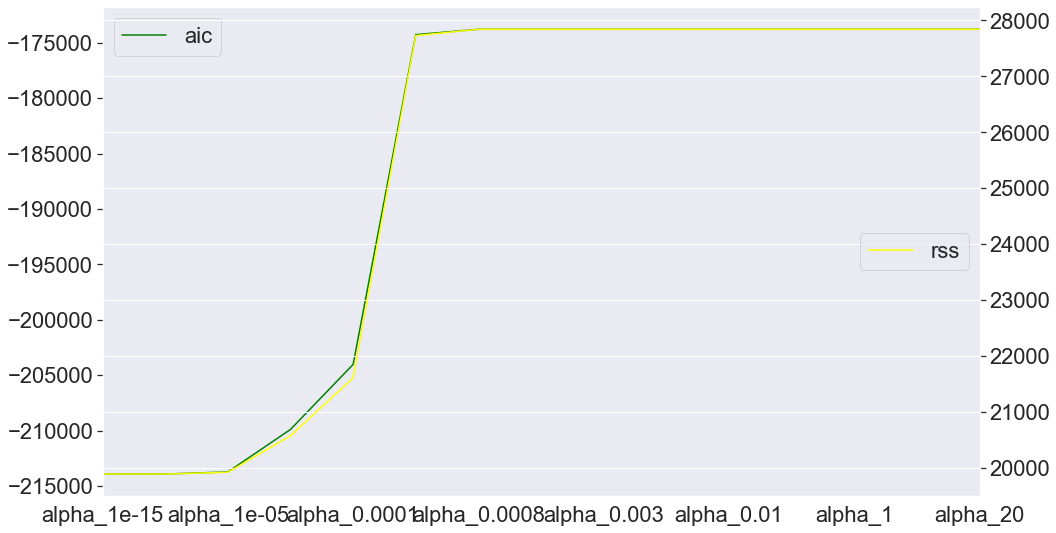

In [130]:
#Plot for RSS VS AIC
plt.figure(figsize=(14,9))
ax1 = coef_matrix_lasso.aic.plot( color = 'green')
plt.legend(loc = 'center left')
ax2 = coef_matrix_lasso.rss.plot(color='yellow', secondary_y = True)
plt.legend(loc = 'center right')
plt.show()


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

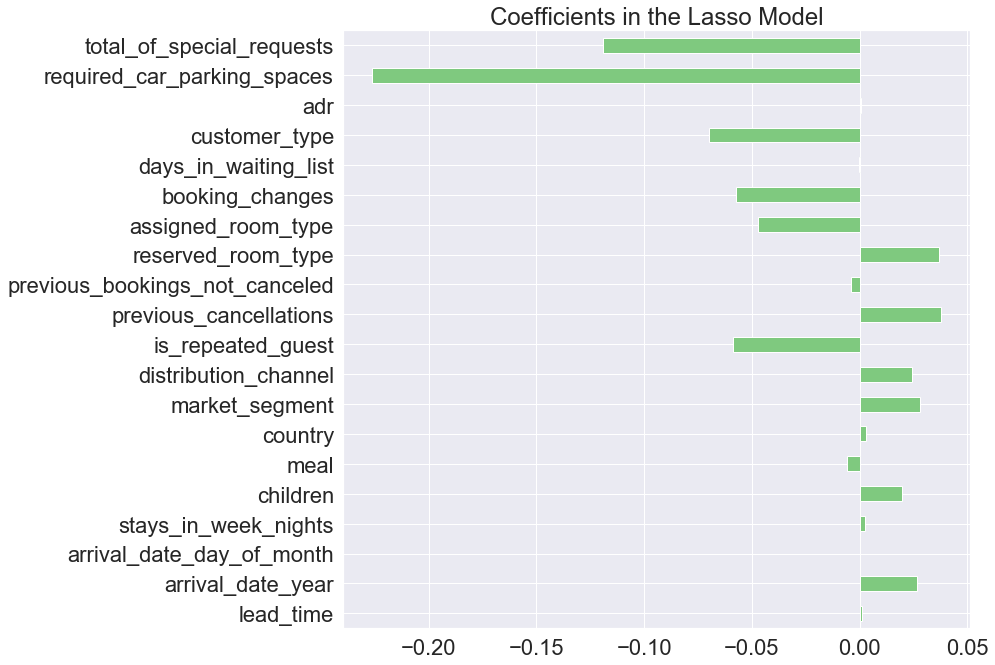

In [131]:
# Represent of the coefficients w.r.t the alpha values for all the columns in the dataset.
matplotlib.rcParams['figure.figsize'] = (10,11)
coef_matrix_lasso2 = coef_matrix_lasso[coef_matrix_lasso.columns[4:26]]
coef_matrix_lasso2.iloc[2].plot(kind = "barh",colormap='Accent')
plt.title("Coefficients in the Lasso Model")

## Performing Random Forest Classifier:


*   Grid search
*   Model Tuning- Parameters implemented: 

      * n_estimators,

      * min_samples_split,

      * max_features

      * max_depth

In [132]:
#Dropping the reservation_status column:
df2 = df1.drop(columns = ['arrival_date_day_of_month','stays_in_week_nights','children','meal','previous_bookings_not_canceled',
                          'reserved_room_type','days_in_waiting_list'], axis=1)
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'assigned_room_type', 'booking_changes',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [133]:
X = df2.drop(["is_canceled"], axis=1)
y = df2["is_canceled"]

In [134]:
#splitting data into training and testing subsets(70:30 ratio)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)
classifier4 = RandomForestClassifier(n_estimators=10)
classifier4.fit( X_train, y_train )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
y_pred4 = classifier4.predict( X_test )
y_prob = classifier4.predict_proba(X_test)[:,1]

In [137]:
cm4 = confusion_matrix( y_test, y_pred4 )
print(cm4)

[[20737  1741]
 [ 2919 10420]]


In [138]:
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm4[0,0] + cm4[1,1] )/len(X_test)))
print(cm4)
print(classification_report(y_test,y_pred4))

Accuracy on Test Set for RandomForest = 0.87
[[20737  1741]
 [ 2919 10420]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     22478
           1       0.86      0.78      0.82     13339

    accuracy                           0.87     35817
   macro avg       0.87      0.85      0.86     35817
weighted avg       0.87      0.87      0.87     35817



In [139]:
scoresRF4 = cross_val_score( classifier4, X_train, y_train, cv=2)
print("Mean RandomForest CrossVal Train Set Accuracy Mean: %.2f" % (scoresRF4.mean()))

Mean RandomForest CrossVal Train Set Accuracy Mean: 0.86


ROC score is: 0.9321099553465647


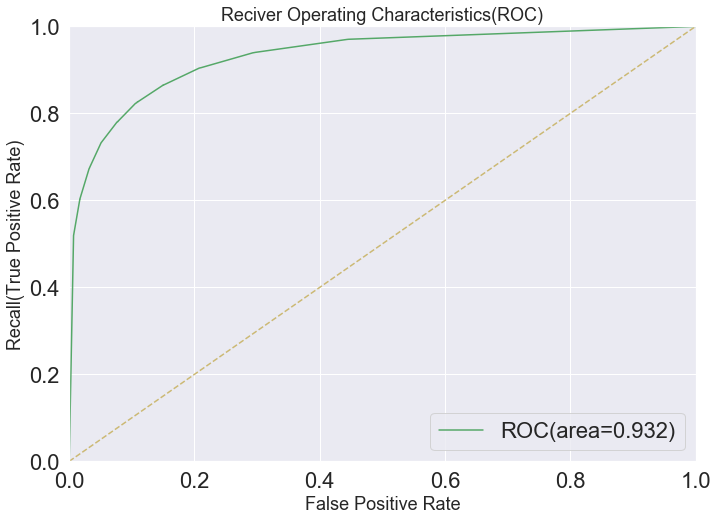

AUC: 0.9321099553465647


In [140]:
roc_score = roc_auc_score(y_test,y_prob)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_prob)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

## Model Tuning:

In [141]:
param_grid = {'n_estimators':np.arange(10,100,500),}
param_grid
RF2 = RandomForestClassifier()
RF_n_est_cv= GridSearchCV(RF2,param_grid,cv=5)
RF_n_est_cv.fit(X,y)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [142]:
print(' n_estimators from 10 to 100 ')
print(RF_n_est_cv.best_score_)
print(RF_n_est_cv.best_params_)
RF_n_est_cv.cv_results_


 n_estimators from 10 to 100 
0.6088282100678448
{'n_estimators': 10}


{'mean_fit_time': array([0.68120737]),
 'std_fit_time': array([0.02518576]),
 'mean_score_time': array([0.03407922]),
 'std_score_time': array([0.00616076]),
 'param_n_estimators': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}],
 'split0_test_score': array([0.61755591]),
 'split1_test_score': array([0.63141804]),
 'split2_test_score': array([0.69415361]),
 'split3_test_score': array([0.59297261]),
 'split4_test_score': array([0.50804087]),
 'mean_test_score': array([0.60882821]),
 'std_test_score': array([0.06045889]),
 'rank_test_score': array([1], dtype=int32)}

In [143]:
#In case of classifier like random the parameter to be tuned is n_neighbors
param_grid_min_samp_split  = {'n_estimators': [10], 
              'min_samples_split':np.arange(2,5)} 
param_grid_min_samp_split

RF2 = RandomForestClassifier()
RF_min_smp_cv1= GridSearchCV(RF2,param_grid_min_samp_split,cv=5)
RF_min_smp_cv1.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [144]:
print(RF_min_smp_cv1.best_score_)
print(RF_min_smp_cv1.best_params_)
RF_min_smp_cv1.cv_results_

0.6118686657173968
{'min_samples_split': 2, 'n_estimators': 10}


{'mean_fit_time': array([0.74400115, 0.66229739, 0.66206822]),
 'std_fit_time': array([0.04211017, 0.01347181, 0.01243352]),
 'mean_score_time': array([0.03634405, 0.03413162, 0.03370781]),
 'std_score_time': array([0.00852173, 0.00547685, 0.00517529]),
 'param_min_samples_split': masked_array(data=[2, 3, 4],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 10, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_split': 2, 'n_estimators': 10},
  {'min_samples_split': 3, 'n_estimators': 10},
  {'min_samples_split': 4, 'n_estimators': 10}],
 'split0_test_score': array([0.60088785, 0.61148337, 0.61558757]),
 'split1_test_score': array([0.59636485, 0.60562024, 0.60683474]),
 'split2_test_score': array([0.70060307, 0.69855097, 0.69771338]),
 'split3_test_score': array([0.59427088, 0.58798894, 0.59087863]),
 'split4_test_score': a

In [145]:
#In case of classifier like random the parameter to be tuned is n_neighbors
param_grid_3 = {'n_estimators': [10],
              'min_samples_split': [2], 
              'max_features': ['auto', 'sqrt', 'log2', None ],
              'max_depth': [10,13, None] }

param_grid_3

RF2 = RandomForestClassifier()
RF_3_cv= GridSearchCV(RF2,param_grid_3,cv=5)
RF_3_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [146]:
print(RF_3_cv.best_score_)
print(RF_3_cv.best_params_)
RF_3_cv.cv_results_

0.6687159728620488
{'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}


{'mean_fit_time': array([0.41808214, 0.39827409, 0.42763391, 1.30554199, 0.46580977,
        0.48247657, 0.54583068, 1.5491117 , 0.78510633, 0.69503975,
        0.69227996, 1.90362453]),
 'std_fit_time': array([0.01867607, 0.00950424, 0.0351626 , 0.09111752, 0.01660626,
        0.01889334, 0.00841149, 0.06601745, 0.05014206, 0.01022045,
        0.02815712, 0.03784531]),
 'mean_score_time': array([0.02467642, 0.02260017, 0.02406344, 0.02352629, 0.02627707,
        0.02711563, 0.02845235, 0.02706141, 0.03605056, 0.03468356,
        0.03462911, 0.0316833 ]),
 'std_score_time': array([0.0037511 , 0.0009117 , 0.00209009, 0.00122213, 0.00100505,
        0.00189525, 0.00261038, 0.00281547, 0.00521359, 0.0057658 ,
        0.00498828, 0.00506893]),
 'param_max_depth': masked_array(data=[10, 10, 10, 10, 13, 13, 13, 13, None, None, None, None],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
     

In [147]:
classifier_rf_01 = RandomForestClassifier(n_estimators=10, min_samples_split =2,max_depth = 10,max_features = 'sqrt')
classifier_rf_01.fit( X_train, y_train )
y_pred_rf_01 = classifier_rf_01.predict( X_test )

cm_rf_01 = confusion_matrix( y_test, y_pred_rf_01 )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm_rf_01[0,0] + cm_rf_01[1,1] )/len(X_test)))
scoresRF4 = cross_val_score( classifier_rf_01, X_train, y_train, cv=2)
print("Mean RandomForest CrossVal Train Set Accuracy Mean: %.5f and Standard Deviation: %.5f \n" % (scoresRF4.mean(), scoresRF4.std() ))

print(classification_report(y_test,y_pred_rf_01))

Accuracy on Test Set for RandomForest = 0.84
Mean RandomForest CrossVal Train Set Accuracy Mean: 0.83790 and Standard Deviation: 0.00125 

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     22478
           1       0.83      0.71      0.77     13339

    accuracy                           0.84     35817
   macro avg       0.84      0.81      0.82     35817
weighted avg       0.84      0.84      0.84     35817



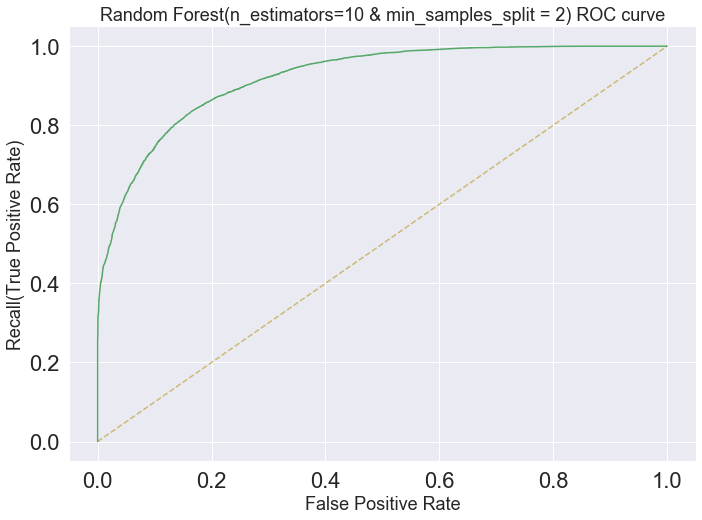

In [148]:
y_pred_proba_rf_01 = classifier_rf_01.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf_01)
plt.figure(figsize=(10,8))

plt.plot([0,1],[0,1],'y--')
plt.plot(fpr,tpr,'g', label='RandomForestClassifier')

plt.title('Random Forest(n_estimators=10 & min_samples_split = 2) ROC curve', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()


In [149]:
roc_auc_score(y_test,y_pred_proba_rf_01)

0.9205909814603372

<h1>Generating the arbitary values</h1>

In [150]:
# Random samples and fetching the new data from the google sheets
data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRz-AFoMEQMfuG-KKsbDRmHislG3-e2mi3VDQ7KHMRDehphh4xKIYcMOd-qd8EeVlGv31ubB6zJj_8B/pub?gid=66502870&single=true&output=csv'
df_arb = pd.read_csv(data_path)
df_arb

,hotel,lead_time,arrival_date_year,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,assigned_room_type,booking_changes,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,342,2015,135,3,1,0,0,2,3,2,0.0,0,0
1,1,456,2016,10,3,1,0,0,2,4,2,0.0,0,0
2,0,27,2014,2,2,1,0,0,2,0,2,75.0,0,0
3,0,75,2015,8,5,0,0,0,0,0,2,105.5,0,0
4,1,23,2015,140,6,3,0,0,1,0,2,123.0,0,0
5,0,77,2016,22,4,2,0,0,2,3,1,75.5,1,0


In [151]:
df_arb.shape

(6, 14)

In [152]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'assigned_room_type', 'booking_changes',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [153]:
# To classify the region of all columns except transaction
#Taking all columns except the main variable transaction
X_rnd_samp = df_arb

y_rnd_samp_pred = classifier4.predict(X_rnd_samp)

In [154]:
# To combine the data along with the prediction values for a clear view

prediction_rnd_samp_df = pd.DataFrame(classifier4.predict(X_rnd_samp), columns = {'Prediction'}).set_index([pd.Index(X_rnd_samp.index)])
probability_rnd_samp_df = pd.DataFrame(classifier4.predict_proba(X_rnd_samp)).set_index([pd.Index(X_rnd_samp.index)])
all_rnd_samp_df = X_rnd_samp.join(prediction_rnd_samp_df).join(probability_rnd_samp_df)
all_rnd_samp_df

,hotel,lead_time,arrival_date_year,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,assigned_room_type,booking_changes,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Prediction,0,1
0,1,342,2015,135,3,1,0,0,2,3,2,0.0,0,0,0,1.0,0.0
1,1,456,2016,10,3,1,0,0,2,4,2,0.0,0,0,0,0.9,0.1
2,0,27,2014,2,2,1,0,0,2,0,2,75.0,0,0,0,0.6,0.4
3,0,75,2015,8,5,0,0,0,0,0,2,105.5,0,0,0,0.8,0.2
4,1,23,2015,140,6,3,0,0,1,0,2,123.0,0,0,0,0.6,0.4
5,0,77,2016,22,4,2,0,0,2,3,1,75.5,1,0,0,0.9,0.1


<h2>Comparison of models</h2>

In [155]:
tabel = pd.DataFrame({"Model": ["Decision Tree (reservation_status included)",
                                "Decision Tree (reservation_status excluded)", 
                                "Logistic Regression(Liblinear)",
                                "Logistic Regression(Lbfgs)",
                                "KNN Classifier",
                                "KNN Classifier with optimum k value",
                                 "Random Forest",
                                "Random Forest Tuned"],
                     "Accuracy Scores": ["1", "0.84", "0.78", "0.73","0.79","0.78", "0.87","0.84"],
                        "ROC | Auc":       ["1", "0.92", "0.84","0.77","0.85","0.83","0.93", "0.95"]})


tabel["Model"] = tabel["Model"].astype("category")
tabel["Accuracy Scores"] = tabel["Accuracy Scores"].astype("float32")
tabel["ROC | Auc"] = tabel["ROC | Auc"].astype("float32")

pd.pivot_table(tabel, index = ["Model"]).sort_values(by = 'Accuracy Scores', ascending=False)


,Accuracy Scores,ROC | Auc
Model,,
Decision Tree (reservation_status included),1.00,1.00
Random Forest,0.87,0.93
Decision Tree (reservation_status excluded),0.84,0.92
Random Forest Tuned,0.84,0.95
KNN Classifier,0.79,0.85
KNN Classifier with optimum k value,0.78,0.83
Logistic Regression(Liblinear),0.78,0.84
Logistic Regression(Lbfgs),0.73,0.77


=> We observe that, the best algorithm is random forest for this data set. 

<h1>Conclusion</h1>

<p>All the models with <i>'reservation_status'</i> column included gives 100% accuracy score.</p>
<p>After excluding <i>'reservation_status'</i> column we observed a decrease in accuracy score</p>

# New Section

*   Considering a new dataset by sorting the holidays in Portugal country. 

*   Below code shows the list of holidays in portugal, which are in between July 2015 to August 2017.


*   Implementing top three accuracy models.

    * Decision Tree 

    * Random forest

    * KNN classifier and 

    * KNN classifier with optimum K value
     

In [156]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,children,meal,country,market_segment,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,2015,1,0,0.0,0,135,3,...,0,2,2,3,0,2,0.0,0,0,1
1,1,0,737,2015,1,0,0.0,0,135,3,...,0,2,2,4,0,2,0.0,0,0,1
2,1,0,7,2015,1,1,0.0,0,59,3,...,0,0,2,0,0,2,75.0,0,0,1
3,1,0,13,2015,1,1,0.0,0,59,2,...,0,0,0,0,0,2,75.0,0,0,1
4,1,0,14,2015,1,2,0.0,0,59,6,...,0,0,0,0,0,2,98.0,0,1,1


In [157]:
df_new = original_dataset.copy()
df_new.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [158]:
df_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [159]:
# Dropping reservation_status column which impacts the data more.
df_new = df_new.drop(columns = ['reservation_status'], axis = 1)



In [160]:
df_new.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,2015-07-03


### Since Portugal is where both the hotels are located, we decided to select the holiday days from portugal and filter out the data to get the accuracy score.

In [161]:
#Filtering the required data
df_new = df_new.loc[(df_new['country']== 'PRT')]
df_new = df_new.loc[(df_new['reservation_status_date'] == '2015-08-15') |
                    (df_new['reservation_status_date'] == '2015-10-05') |
                    (df_new['reservation_status_date'] == '2015-12-01') |
                    (df_new['reservation_status_date'] == '2015-12-08') |   
                    (df_new['reservation_status_date'] == '2015-12-25') |  
                    (df_new['reservation_status_date'] == '2016-01-01') |
                    (df_new['reservation_status_date'] == '2016-02-25') |
                    (df_new['reservation_status_date'] == '2016-04-10') |
                    (df_new['reservation_status_date'] == '2016-04-12') |
                    (df_new['reservation_status_date'] == '2016-04-25') |
                    (df_new['reservation_status_date'] == '2016-05-01') |
                    (df_new['reservation_status_date'] == '2016-06-10') |
                    (df_new['reservation_status_date'] == '2016-06-11') |
                    (df_new['reservation_status_date'] == '2016-08-15') |
                    (df_new['reservation_status_date'] == '2016-10-05') |
                    (df_new['reservation_status_date'] == '2016-12-01') |
                    (df_new['reservation_status_date'] == '2016-12-08') |
                    (df_new['reservation_status_date'] == '2016-12-25') |  
                    (df_new['reservation_status_date'] == '2017-01-01') |
                    (df_new['reservation_status_date'] == '2017-02-25') |
                    (df_new['reservation_status_date'] == '2017-04-10') |
                    (df_new['reservation_status_date'] == '2017-04-12') |
                    (df_new['reservation_status_date'] == '2017-04-25') |
                    (df_new['reservation_status_date'] == '2017-05-01') |
                    (df_new['reservation_status_date'] == '2017-06-10') |
                    (df_new['reservation_status_date'] == '2017-06-11') ]

df_new



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
869,Resort Hotel,0,11,2015,August,31,1,4,10,1,...,0,No Deposit,104.0,NaN,0,Transient,172.00,0,0,2015-08-15
971,Resort Hotel,0,12,2015,August,32,8,2,5,2,...,0,No Deposit,NaN,NaN,0,Transient,252.00,1,1,2015-08-15
973,Resort Hotel,0,75,2015,August,32,8,2,5,2,...,0,No Deposit,250.0,NaN,0,Transient,276.43,1,3,2015-08-15
975,Resort Hotel,0,126,2015,August,32,8,2,5,2,...,0,No Deposit,261.0,NaN,0,Transient,133.00,1,2,2015-08-15
980,Resort Hotel,0,98,2015,August,32,8,2,5,2,...,0,No Deposit,127.0,NaN,0,Transient,138.00,0,0,2015-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113746,City Hotel,0,175,2017,June,23,9,0,2,2,...,0,No Deposit,3.0,NaN,0,Transient-Party,130.00,0,0,2017-06-11
113747,City Hotel,0,175,2017,June,23,9,0,2,2,...,0,No Deposit,3.0,NaN,0,Transient-Party,130.00,0,0,2017-06-11
113748,City Hotel,0,175,2017,June,23,9,0,2,2,...,0,No Deposit,3.0,NaN,0,Transient-Party,130.00,0,0,2017-06-11
113762,City Hotel,0,175,2017,June,23,9,0,2,2,...,0,No Deposit,3.0,NaN,0,Transient-Party,130.00,0,0,2017-06-11


In [162]:
df_new.to_csv('new_filter.csv')



In [163]:
df_new.shape

(1066, 31)

In [164]:
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

print('Missing value ratios:\nCompany: {}\nAgent: {}\nCountry: {}'.format(perc_mv(df_new, df_new['company']),
                                                                                   perc_mv(df_new, df_new['agent']),
                                                                                   perc_mv(df_new, df_new['country'])))

Missing value ratios:
Company: 93.90243902439023
Agent: 28.424015009380867
Country: 0.0


In [165]:

df_new.fillna(df_new.mode().iloc[0], inplace=True)

In [166]:
df_new.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [167]:
df_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date'],
      dtype='object')

In [168]:
enc = LabelEncoder()
df_new.loc[:,['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status_date']] = df_new.loc[:,['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status_date']].apply(enc.fit_transform)
df_new.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
869,1,0,11,2015,1,31,1,4,10,1,...,0,0,104.0,40.0,0,2,172.00,0,0,0
971,1,0,12,2015,1,32,8,2,5,2,...,0,0,240.0,40.0,0,2,252.00,1,1,0
973,1,0,75,2015,1,32,8,2,5,2,...,0,0,250.0,40.0,0,2,276.43,1,3,0
975,1,0,126,2015,1,32,8,2,5,2,...,0,0,261.0,40.0,0,2,133.00,1,2,0
980,1,0,98,2015,1,32,8,2,5,2,...,0,0,127.0,40.0,0,2,138.00,0,0,0


In [169]:
df_new.to_csv('encoder_dummy.csv')

## Feature importance of the data w.r.t is_canceled column.

[0.02597338 0.06720067 0.04362105 0.10265314 0.05709182 0.05840013
 0.04081207 0.04112564 0.02384599 0.01277142 0.00134805 0.02286016
 0.         0.03909932 0.03988977 0.00808028 0.02864702 0.00369372
 0.01421474 0.02207639 0.01454377 0.09963063 0.04047886 0.00468752
 0.00096128 0.02720908 0.03631942 0.03305663 0.03457506 0.05513298]


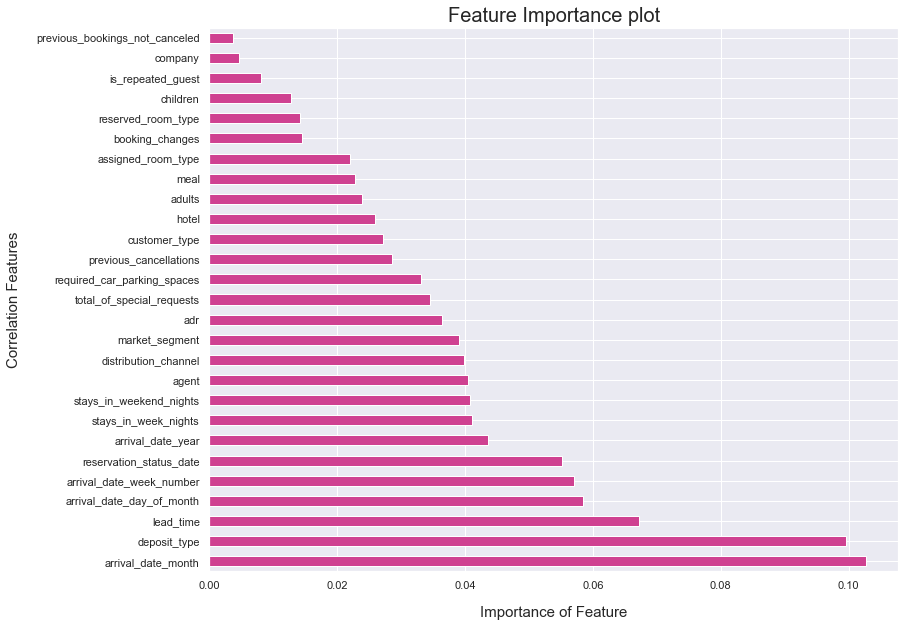

In [170]:
X =df_new.iloc[:,df_new.columns != 'is_canceled' ]
y =df_new.is_canceled
# feature extraction
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
sns.set_style('whitegrid')
plt.figure(figsize=(11,10))
sns.set(style='whitegrid')
sns.set(palette='PiYG')


feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(27).plot(kind = 'barh')
plt.xlabel("Importance of Feature", labelpad = 15, fontsize=15)
plt.ylabel("Correlation Features", labelpad = 15, fontsize=15);
plt.title("Feature Importance plot", fontsize=20)

plt.show()

# Decision Tree



*   By dropping single column named as reservation_status.

In [171]:
X = df_new.drop(["is_canceled"], axis=1)
y = df_new["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [172]:
DTC = DecisionTreeClassifier(max_depth = 12)

In [173]:
DTC_model = DTC.fit(X_train, y_train)

In [174]:
y_pred = DTC.predict(X_test)
y_prob = DTC_model.predict_proba(X_test)[:,1]

In [175]:
print('Accuracy Score: {}'
      .format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.878125


In [176]:
#Cross validation prediction
cv_pred = cross_val_predict(DTC,X_test,y_test,cv=5)
#Cross validation score
cv_score = cross_val_score(DTC,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.8625


In [177]:
confusion_matrix_DTC = confusion_matrix(y_test, y_pred)
print(confusion_matrix_DTC)

[[189  21]
 [ 18  92]]


Text(34.1, 0.5, 'Actual label')

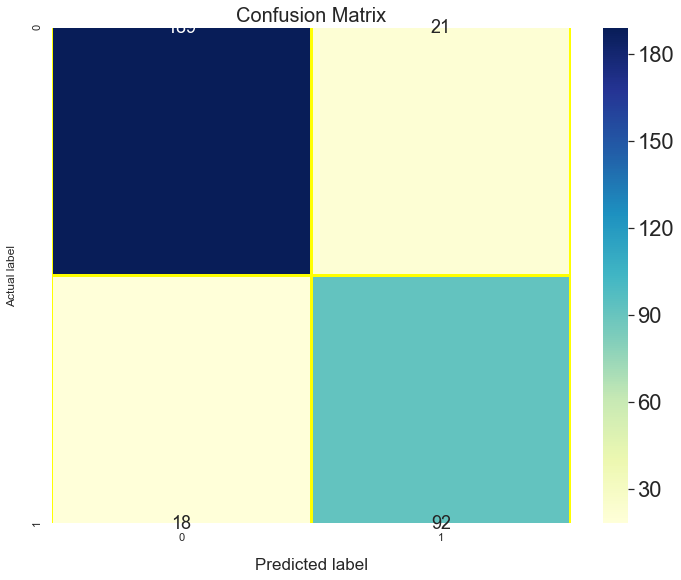

In [178]:
#heatmap 
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(confusion_matrix_DTC),  cmap="YlGnBu", annot=True,fmt="d", linewidths=2, linecolor='yellow',annot_kws={"size":18})


plt.tight_layout()
plt.title('Confusion Matrix', y=1.5, fontsize=20)
plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', labelpad = 15)

ROC score is: 0.8687662337662339


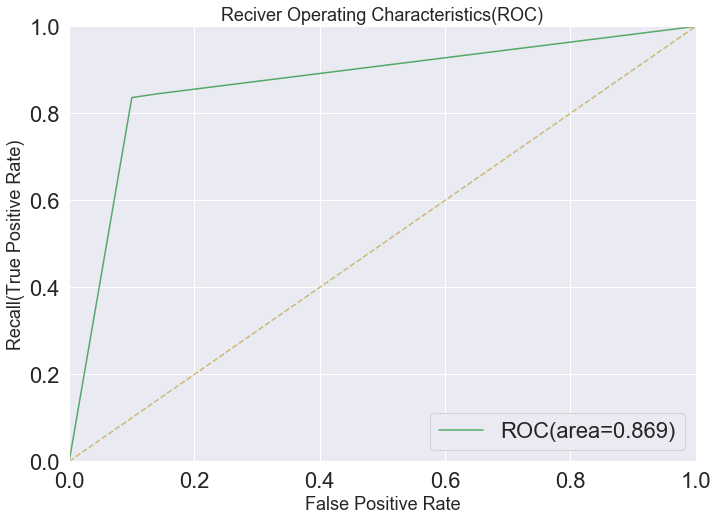

AUC: 0.8687662337662339


In [179]:
roc_score = roc_auc_score(y_test,y_prob)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_prob)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

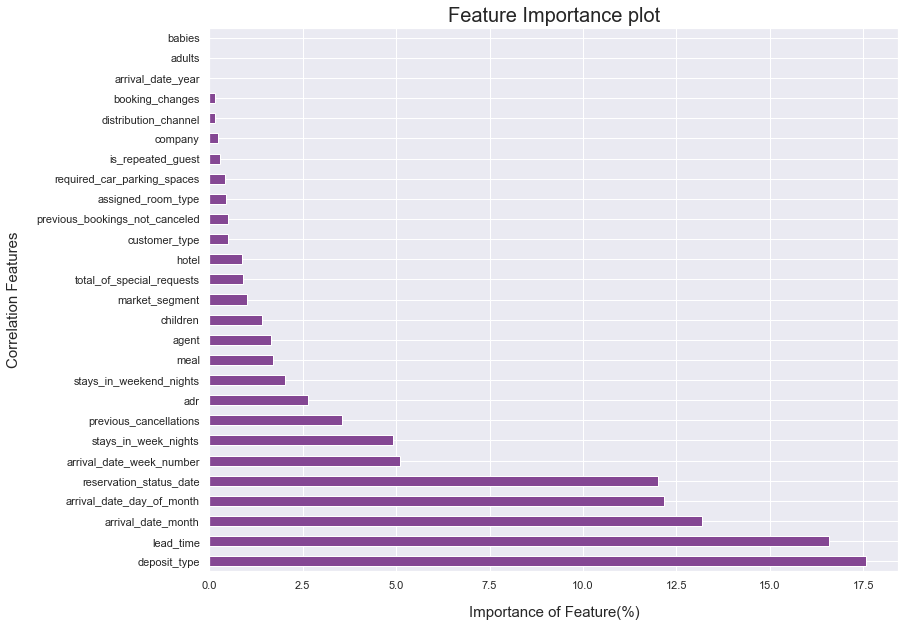

In [180]:
#plot graph of feature importances for better visualization
sns.set_style('whitegrid')
plt.figure(figsize=(11,10))
sns.set(style='whitegrid')
sns.set(palette='PRGn')


feat_importances = pd.Series(DTC_model.feature_importances_*100, index=X_train.columns)
feat_importances.nlargest(27).plot(kind='barh')

plt.xlabel("Importance of Feature(%)", labelpad = 15, fontsize=15)
plt.ylabel("Correlation Features", labelpad = 15, fontsize=15);
plt.title("Feature Importance plot", fontsize=20)

plt.show()

After dropping top three columns('arrival_date_month','deposit_type','lead_time') with highest feature importance.

In [181]:
df_edit = df_new.drop(columns = ['arrival_date_month','deposit_type','lead_time'], axis=1)
df_edit.head()

,hotel,is_canceled,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
869,1,0,2015,31,1,4,10,1,0.0,0,...,0,0,104.0,40.0,0,2,172.00,0,0,0
971,1,0,2015,32,8,2,5,2,2.0,0,...,6,0,240.0,40.0,0,2,252.00,1,1,0
973,1,0,2015,32,8,2,5,2,2.0,0,...,2,0,250.0,40.0,0,2,276.43,1,3,0
975,1,0,2015,32,8,2,5,2,0.0,1,...,0,0,261.0,40.0,0,2,133.00,1,2,0
980,1,0,2015,32,8,2,5,2,0.0,0,...,0,0,127.0,40.0,0,2,138.00,0,0,0


# Decision Tree



* By dropping  three other important features from the dataset ('arrival_date_month', 'deposit_type', 'lead_time')

In [182]:
X = df_edit.drop(["is_canceled"], axis=1)
y = df_edit["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [183]:
DTC = DecisionTreeClassifier(max_depth = 12)

In [184]:
DTC_model = DTC.fit(X_train, y_train)

In [185]:
y_pred = DTC.predict(X_test)
y_prob = DTC_model.predict_proba(X_test)[:,1]

In [186]:
print('Accuracy Score: {}'
      .format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8375


In [187]:
#Cross validation prediction
cv_pred = cross_val_predict(DTC,X_test,y_test,cv=5)
#Cross validation score
cv_score = cross_val_score(DTC,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.825


In [188]:
confusion_matrix_DTC = confusion_matrix(y_test, y_pred)
print(confusion_matrix_DTC)

[[179  31]
 [ 21  89]]


Text(34.1, 0.5, 'Actual label')

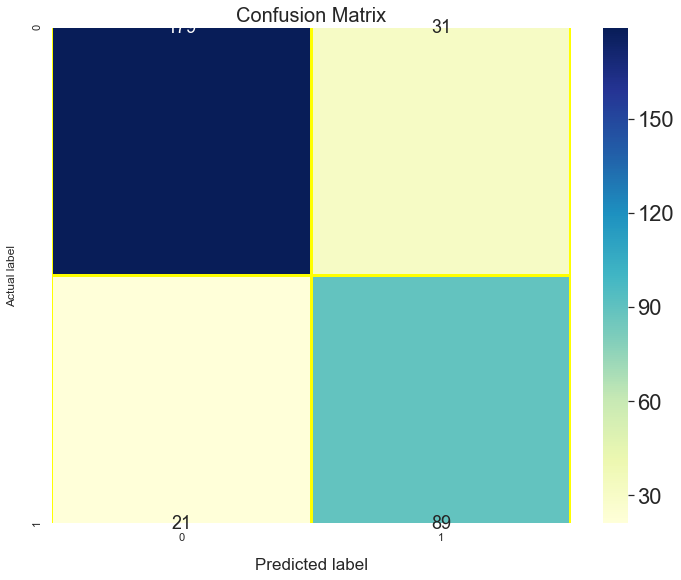

In [189]:
#heatmap 
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(confusion_matrix_DTC),  cmap="YlGnBu", annot=True,fmt="d", linewidths=2, linecolor='yellow',annot_kws={"size":18})


plt.tight_layout()
plt.title('Confusion Matrix', y=1.5, fontsize=20)
plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', labelpad = 15)

ROC score is: 0.830865800865801


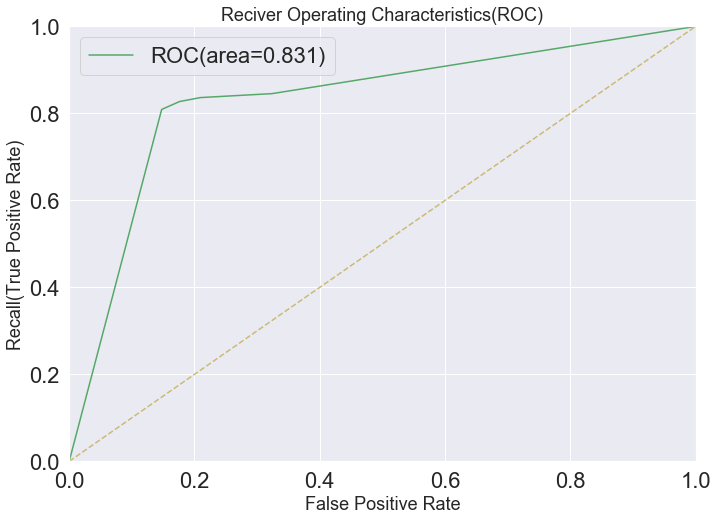

AUC: 0.830865800865801


In [190]:
roc_score = roc_auc_score(y_test,y_prob)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_prob)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

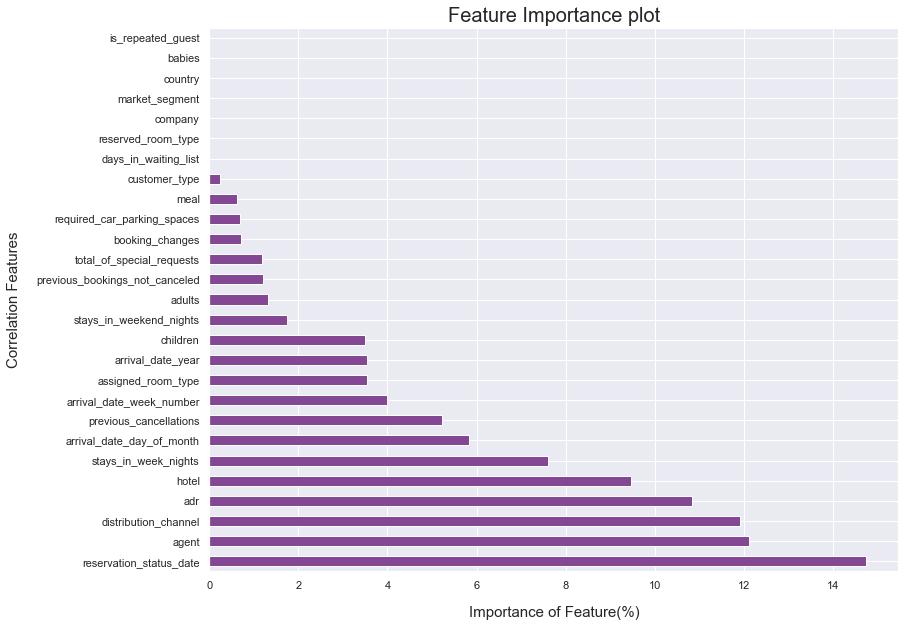

In [191]:
#plot graph of feature importances for better visualization
sns.set_style('whitegrid')
plt.figure(figsize=(11,10))
sns.set(style='whitegrid')
sns.set(palette='PRGn')


feat_importances = pd.Series(DTC_model.feature_importances_*100, index=X_train.columns)
feat_importances.nlargest(27).plot(kind='barh')

plt.xlabel("Importance of Feature(%)", labelpad = 15, fontsize=15)
plt.ylabel("Correlation Features", labelpad = 15, fontsize=15);
plt.title("Feature Importance plot", fontsize=20)

plt.show()

*   Intially, we  dropped reservation_status column which has the highest correlation with is_canceled column and we got an accuracy of 87% which is identical to accuracy of decision tree where dropping next top three highest correlation columns.




# Random Forest

In [192]:
#splitting data into training and testing subsets(70:30 ratio)
X = df_new.drop(["is_canceled"], axis=1)
y = df_new["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)
classifier4 = RandomForestClassifier(n_estimators=10)
classifier4.fit( X_train, y_train )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [193]:
y_pred4 = classifier4.predict( X_test )
y_prob = classifier4.predict_proba(X_test)[:,1]

In [194]:
cm4 = confusion_matrix( y_test, y_pred4 )
print(cm4)

[[203   7]
 [ 17  93]]


Text(34.1, 0.5, 'Actual label')

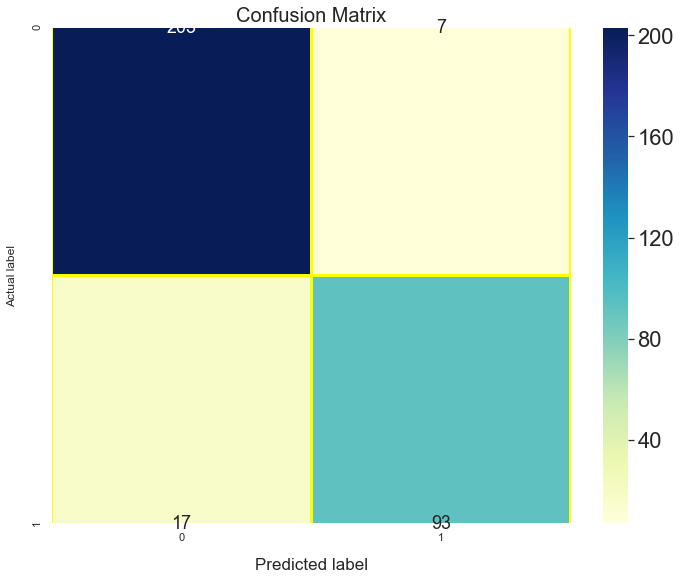

In [195]:
#heatmap 
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(cm4),  cmap="YlGnBu", annot=True,fmt="d", linewidths=2, linecolor='yellow',annot_kws={"size":18})


plt.tight_layout()
plt.title('Confusion Matrix', y=1.5, fontsize=20)
plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', labelpad = 15)

In [196]:
scoresRF4 = cross_val_score( classifier4, X_train, y_train, cv=2)
print("Mean RandomForest CrossVal Train Set Accuracy Mean: %.2f" % (scoresRF4.mean()))

Mean RandomForest CrossVal Train Set Accuracy Mean: 0.89


ROC score is: 0.955


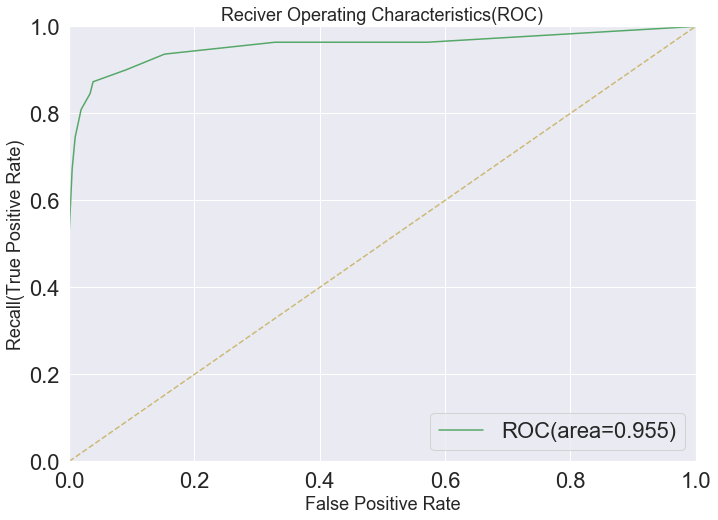

AUC: 0.955


In [197]:
roc_score = roc_auc_score(y_test,y_prob)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_prob)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

# KNN Classifier

In [198]:
#splitting data into training and testing subsets(70:30 ratio)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [199]:
#fitting training data to the model
  
KNN = KNeighborsClassifier(n_neighbors=5)  
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [200]:
y_pred = KNN.predict(X_test)
y_prob = KNN.predict_proba(X_test)[:,1]

In [201]:
print('Accuracy Score: {}'
      .format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.825


In [202]:
cv_scores_KNN = cross_val_score(KNN, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores_KNN.mean())

Mean Score of CV:  0.6437268544495567


In [203]:
#Cross validation prediction
cv_pred = cross_val_predict(KNN,X_test,y_test,cv=5)
#Cross validation score
cv_score = cross_val_score(KNN,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.753125


In [204]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred)
print(confusion_matrix_knn)

[[188  22]
 [ 34  76]]


Text(24.1, 0.5, 'Actual label')

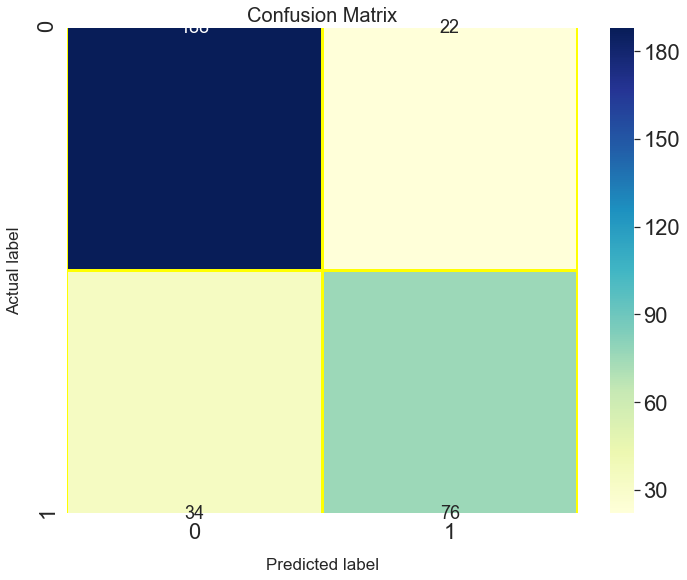

In [205]:
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(confusion_matrix_knn),  cmap="YlGnBu", annot=True,fmt="d", linewidths=2, linecolor='yellow',annot_kws={"size":18})


#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.5, fontsize=20)
plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', labelpad = 15, fontsize=17)

ROC score is: 0.8772294372294371


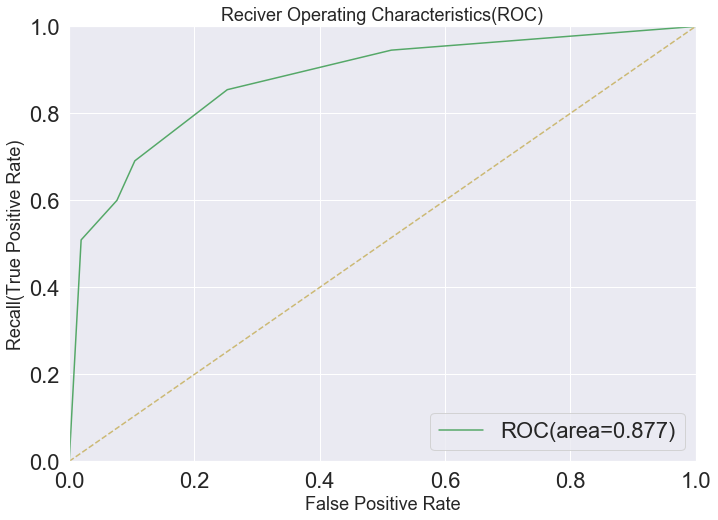

AUC: 0.8772294372294371


In [206]:
#ROC_AUC curve

roc_score = roc_auc_score(y_test,y_prob)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_prob)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

# Choosing optimum K value

In [207]:
error = []
# Calculating error for K values between 1 and 40

for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

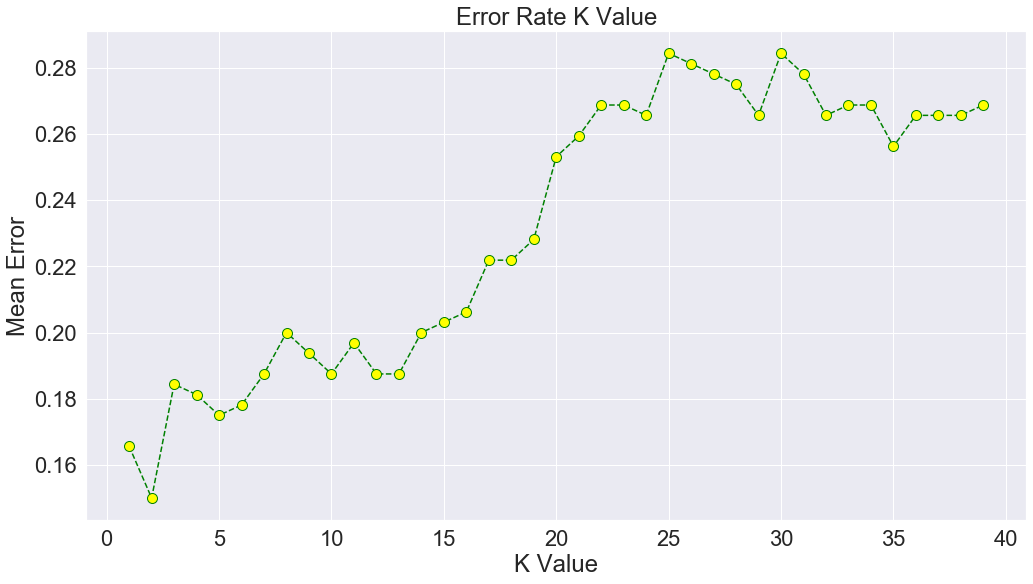

In [208]:
plt.figure(figsize=(15,9))  
plt.plot(range(1, 40), error, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 
plt.show()

In [209]:
KNN1 = KNeighborsClassifier(n_neighbors=1)  
KNN1.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [210]:
y_pred = KNN1.predict(X_test)
y_prob = KNN1.predict_proba(X_test)[:,1]

In [211]:
print('Accuracy Score: {}'
      .format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.834375


In [212]:
cv_scores_KNN1 = cross_val_score(KNN1, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores_KNN1.mean())

Mean Score of CV:  0.6652732577712939


In [213]:
#cv_score = cross_val_score(logreg,X_test_res,y_test_res,cv=5)
#print('cross_val_score :',np.average(cv_score))
#Cross validation prediction
cv_pred = cross_val_predict(KNN1,X_test,y_test,cv=5)
#Cross validation score
cv_score = cross_val_score(KNN1,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.771875


In [214]:
confusion_matrix_knn_k = confusion_matrix(y_test, y_pred)
print(confusion_matrix_knn_k)

[[180  30]
 [ 23  87]]


Text(24.1, 0.5, 'Actual label')

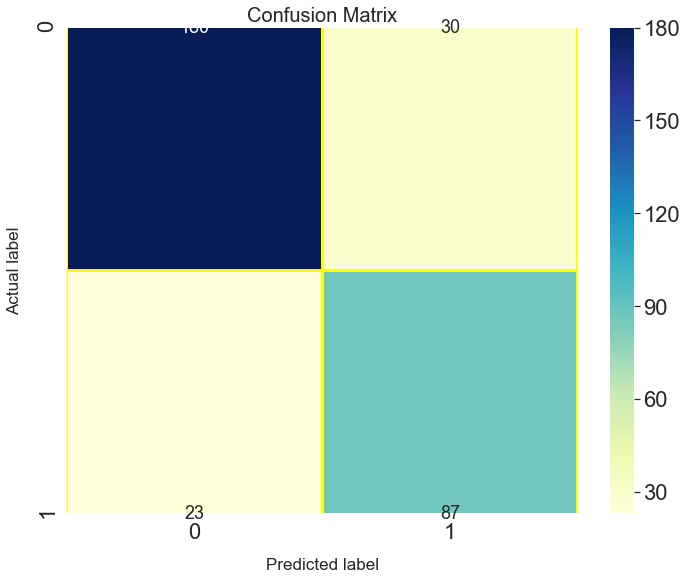

In [215]:
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(confusion_matrix_knn_k),  cmap="YlGnBu", annot=True,fmt="d", linewidths=2, linecolor='yellow',annot_kws={"size":18})

#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.5, fontsize=20)
plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', labelpad = 15, fontsize=17)

ROC score is: 0.8240259740259741


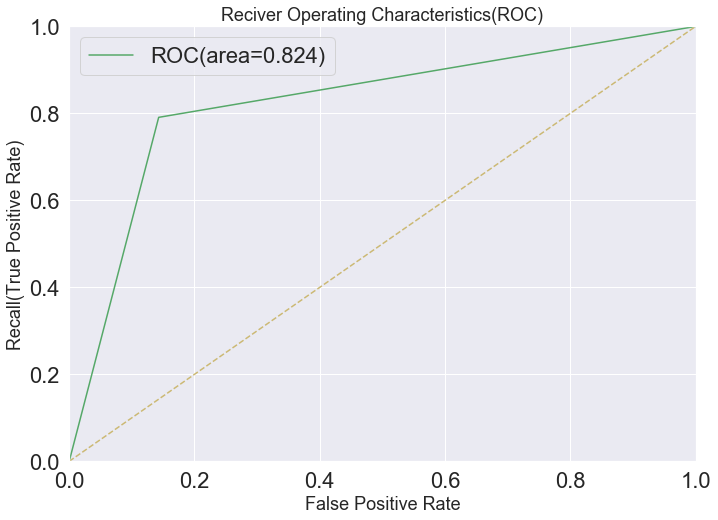

AUC: 0.8240259740259741


In [216]:
#ROC_AUC curve

roc_score = roc_auc_score(y_test,y_prob)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_prob)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

In [217]:
tabel = pd.DataFrame({"Model": ["Decision Tree (reservation_status excluded)",
                                "Decision Tree ('arrival_date_month','deposit_type','lead_time' columns excluded)", 
                                "Random Forest(reservation_status excluded)",
                                "KNN Classifier(reservation_status excluded)",
                                "KNN Classifier with optimum k value"],
                     "Accuracy Scores": ["0.87", "0.87", "0.89","0.78","0.84"],
                        "ROC | Auc":       ["0.84", "0.87", "0.95","0.82","0.84"]})
tabel["Model"] = tabel["Model"].astype("category")
tabel["Accuracy Scores"] = tabel["Accuracy Scores"].astype("float32")
tabel["ROC | Auc"] = tabel["ROC | Auc"].astype("float32")

pd.pivot_table(tabel, index = ["Model"]).sort_values(by = 'Accuracy Scores', ascending=False)

,Accuracy Scores,ROC | Auc
Model,,
Random Forest(reservation_status excluded),0.89,0.95
"Decision Tree ('arrival_date_month','deposit_type','lead_time' columns excluded)",0.87,0.87
Decision Tree (reservation_status excluded),0.87,0.84
KNN Classifier with optimum k value,0.84,0.84
KNN Classifier(reservation_status excluded),0.78,0.82


From the above comparision table, which compares the models w.r.t accuracy and area under the curve values.

* Random forest classifier performs a good accuracy than compared to the other, when 'reservation_status' column excluded it gives 89% of accuracy score.

* In decision tree classifier, it shows same accuracy score when dropping one or three columns.

# Testing

In [218]:
# Random samples and fetching the new data from the google sheets
data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTOI6JJPfM0cxqq5NohqX79VL3nyZBsFqFiz0cIcQaghLBnj7q3yvZk5eKzqtBvNQvbnnun5c6OwIJT/pub?gid=1730668257&single=true&output=csv'
df_arb = pd.read_csv(data_path)
df_arb

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,1,2,2016,10,41,2,2,1,2,0,...,0,0,250,40,0,2,81.0,0,1,13
1,1,110,2015,1,32,8,2,5,2,0,...,0,0,15,40,0,2,107.0,0,1,0
2,1,3,2017,0,15,9,1,0,2,0,...,0,0,250,40,0,1,85.0,0,3,18
3,1,0,2016,0,16,11,1,0,1,0,...,0,0,240,86,0,2,65.4,1,0,7
4,1,0,2017,0,17,24,1,0,2,0,...,0,0,240,437,0,2,72.0,1,0,20


In [219]:
# To classify the region of all columns except is_canceled
#Taking all columns except the main variable is_canceled
X_rnd_samp = df_arb
y_rnd_samp_pred = classifier4.predict(X_rnd_samp)

In [220]:
# To combine the data along with the prediction values for a clear view

prediction_rnd_samp_df = pd.DataFrame(classifier4.predict(X_rnd_samp), columns = {'Prediction'}).set_index([pd.Index(X_rnd_samp.index)])
probability_rnd_samp_df = pd.DataFrame(classifier4.predict_proba(X_rnd_samp)).set_index([pd.Index(X_rnd_samp.index)])
all_rnd_samp_df = X_rnd_samp.join(prediction_rnd_samp_df).join(probability_rnd_samp_df)
all_rnd_samp_df

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,Prediction,0,1
0,1,2,2016,10,41,2,2,1,2,0,...,40,0,2,81.0,0,1,13,0,0.9,0.1
1,1,110,2015,1,32,8,2,5,2,0,...,40,0,2,107.0,0,1,0,0,0.8,0.2
2,1,3,2017,0,15,9,1,0,2,0,...,40,0,1,85.0,0,3,18,0,0.8,0.2
3,1,0,2016,0,16,11,1,0,1,0,...,86,0,2,65.4,1,0,7,0,1.0,0.0
4,1,0,2017,0,17,24,1,0,2,0,...,437,0,2,72.0,1,0,20,0,1.0,0.0


## Conclusion:
#### 1. Benefits of hotel booking engine: Hotel booking engine increases the revenue and profit of hotels.
#### 2. In all performance metrics, Random Forest model have the highest percentage than other models. This model has a better prediction of actual cancel bookings and predict least false canceled booking. As a result of all this numbers, Random Forest is the best-predicted algorithms in all models.
#### 3. The model also predicts that majority of the bookings wont get cancelled.
#### 4. Although resorts only account for 1/3 of all bookings, they out-compete city hotels when there is a baby in the booking group.
#### 5. Lastly, most bookings came from independent travelers and there is a significantly low rate of return (<10%). Hotels should take efforts to improve relationships with customers or target past guests for return stays.

<h2>References:</h2>

<p><b> [1]Machine Learning Basics with the K-Nearest Neighbors Algorithm </b></p>
<p>https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761</p>
<p><b>[2] Logistic Regression — Detailed Overview</b></p>
<p>https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc</p>
<p><b> [3]Understanding Random Forest</b></p>
<p>https://towardsdatascience.com/understanding-random-forest-58381e0602d2</p>
<p> <b>[4] Ridge and Lasso Regression: L1 and L2 Regularization</b></p>
<p>https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b</p>
<p><b>[5] Comparative Study on classification algorithms</b></p>
<p>https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222</p>